In [1]:
%load_ext autoreload
%autoreload 2
import geopandas as gpd
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

directory = '/scratch/6256481/'

import sys
sys.path.insert(0, directory + f'python/py_code/')

from support import open_mg_file
from get_orthogonals import get_orthogonals
from dem import find_dem

from support import create_dir
import glob

import warnings
warnings.filterwarnings("ignore")


# from main import main




In [2]:
sourceFiles  = np.sort(glob.glob(directory + 'input/SWOT_vector/*.shp'))
nodeFiles    = np.sort(glob.glob(directory + 'results/new_segments/node/*.shp'))
vectorFiles  = np.sort(glob.glob(directory + 'results/new_segments/vector/*.shp'))
F_5  = np.sort(glob.glob(directory + 'results/all/*5_5_0*'))
nodeFiles[0]
F_5[0]

'/scratch/6256481/results/all/af_11_5_5_0.csv'

In [9]:
sourceFiles[11]


'/scratch/6256481/input/SWOT_vector/as_sword_reaches_hb34_v16.shp'

In [30]:
a = A[abs(1 - (A['LCheck'] / A['reach_len'])) > 0.1]
a

,reach_id,short,LCheck,reach_len
1192,62241200021,0,34772.677873,40215.054761
2200,62252500571,0,48653.596978,70234.637200
2289,62252500011,0,41427.525837,63008.566074
2291,62252500031,0,41427.525837,63008.566074
8084,62292100011,0,40248.742749,56813.831466
9243,62293100011,0,159164.676153,198671.282296
9244,62293100021,0,123817.500365,140708.485159
9246,62293100041,1,268466.244497,415553.359507
9247,62293100051,1,261620.997179,405682.583375
9253,62293100141,1,258529.738284,395836.807033


<Axes: >

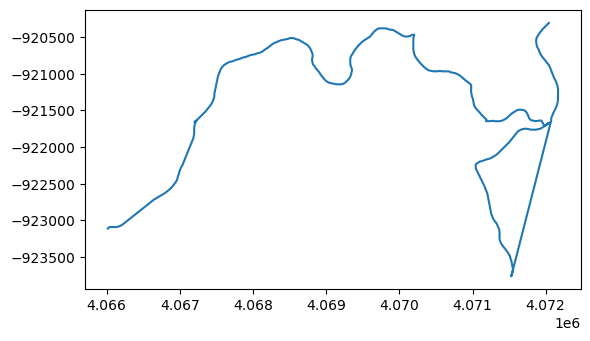

In [21]:
df[df.reach_id == 11744700021].plot()

In [24]:




# df = open_mg_file(np.sort(vectorFiles)[0], 'EPSG:3857')
# df_node = gpd.read_file(nodeFiles[0])
# from inflection_points import inflection_points

# projection = 'EPSG:3857'
df = gpd.read_file(vectorFiles[-6])
A = df[['reach_id', 'short', 'LCheck', 'reach_len']]
A

,reach_id,short,LCheck,reach_len
0,62221200011,0,13426.498083,13426.498083
1,62221200021,0,16569.800142,16569.800142
2,62221200031,0,18411.860644,18411.860644
3,62221200041,0,10136.001242,10136.001242
4,62221200051,0,10111.126488,10111.126488
...,...,...,...,...
16708,62500601321,0,10270.512719,10270.512719
16709,62500601341,0,18087.639496,18087.639496
16710,62500601351,0,18148.354553,18148.354553
16711,62500601501,0,50271.863408,50409.889488


11410000021




11410000021
<GeometryArray>
[<POINT (231938.177 9982476.921)>, <POINT (231968.914 9983148.559)>,
 <POINT (231216.664 9983737.783)>, <POINT (230658.006 9984455.588)>,
 <POINT (229366.298 9986767.322)>, <POINT (229921.067 9987266.737)>,
 <POINT (230695.421 9988034.557)>,  <POINT (231287.734 9987562.03)>]
Length: 8, dtype: geometry <GeometryArray>
[ <POINT (233140.71 9981306.234)>,      <POINT (231931.12 9982924)>,
  <POINT (231793.597 9983258.62)>, <POINT (231154.899 9984051.589)>,
  <POINT (230601.58 9984752.447)>,  <POINT (229555.574 9987089.22)>,
 <POINT (230336.141 9987739.689)>,  <POINT (231026.54 9987811.883)>,
 <POINT (231295.156 9987555.345)>]
Length: 9, dtype: geometry
EPSG:32738 EPSG:32738






TypeError: 'Point' object is not subscriptable

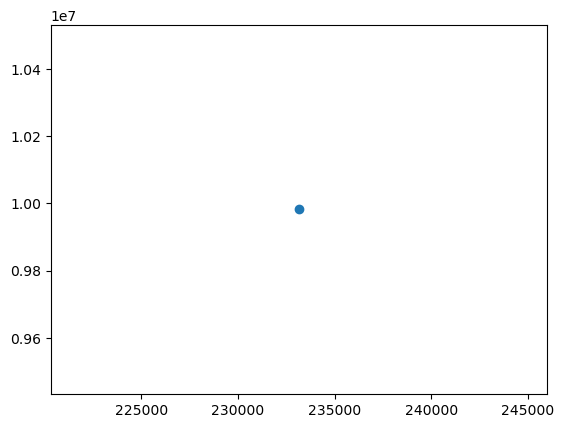

In [84]:
ids = df.reach_id.values[0:10]
for id in ids:
# for id in tqdm(ids):

    reach = df[df.reach_id == id]
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # CHANGE TO CORRECT LENGTH CHECK!!!!!!!!!
    if (reach.iloc[0].geometry.length < (12*4*30)) | (reach.iloc[0].node_mwm < 30):
        continue

    # try:
    sin5_0, infP5_0, apex5_0, apexP5_0, ang5_0 = inflection_points(id, df, df_node,
                                                                                        projection, False,
                                                                                        s = 5, degree = 0,
                                                                                        end_points = True)  

    # except:
        # sin5_0, infP5_0, apex5_0, apexP5_0, ang5_0 = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan


        # code_failure += 'Inlfection Point failure'
    
    df.loc[reach.index, 'sin5_0']     = sin5_0
    df.at[reach.index[0], 'infP5_0']  = infP5_0
    df.at[reach.index[0], 'apex5_0']  = apex5_0
    df.at[reach.index[0], 'apexP5_0'] = apexP5_0
    df.at[reach.index[0], 'ang5_0']   = ang5_0

    ########
    # Confinemet Inflection point method
    reach = df[df.reach_id == id]

    cross_slope_distance = 5
    inf_settings_input   = [5,0]

    # try:

        
    # CHECKKKKKKK
    print(id)
    demWidth = reach.iloc[0].node_mwm * 1.2
    raster = find_dem(reach, directory, projection,
                        demWidth*cross_slope_distance, False) # *1.2 to create extra buffer
    apexP = apexP5_0
    
    
    if isinstance(apexP, list) == True:
    
        so,si,po,pi,cd = get_orthogonals(reach,df_node, raster, 
                                            projection, demWidth*1.2, 
                                            cross_slope_distance,inf_settings_input, 
                                            directory, True, 400)
    else:
        so = si = po = pi = cd = np.nan

# r[r.argsort()[0]

In [5]:
F_5  = glob.glob(directory + 'results/all/*5_5_0*')
Failed = glob.glob(directory + 'results/all/*txt')
F_10 = glob.glob(directory + 'results/new_segments/vector/*.shp')

print(len(F_5), len(F_10), len(Failed))


49 60 10


In [19]:
F_5_txt = [F[-15:-10] for F in F_5]
F_10_txt = [F[-29:-24] for F in F_10]
Failed_txt = [F[-26:-21] for F in Failed]

for f in F_10_txt:
    if (f in F_5_txt) | (f in Failed_txt):
        a = 1
    else:
        print(f)

as_42


In [48]:
df = open_mg_file(np.sort(F_5)[0], 'EPSG:3857')
df.head()

,x,y,reach_id,reach_len,n_nodes,wse,wse_var,width,width_var,facc,...,apex5_0,apexP5_0,ang5_0,outSlope,innSlope,outPR,innPR,CDists,sin5_0,vc
0,42.582381,-0.135846,11410000021,10528.796398,52,1.7,0.000000,94.0,495.646181,740052.747031,...,"[262.11546367213447, 120.70556105935916, 148.9...","[POINT (4741286.485 -17632.564), POINT (474131...","[0.000732537623891483, 0.003609713651367817, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[495.87259615366423, 495.8725961539832, 495.87...",1.120744,LINESTRING EMPTY
1,42.594848,-0.091447,11410000031,10471.954291,52,1.7,0.030291,84.0,230.260156,739619.603428,...,"[80.37746849641896, 159.05207045965116, 112.66...","[POINT (4741286.378 -12524.733), POINT (474264...","[0.00035730540664024506, 0.0013236937617343914...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[424.03341346193696, 424.03341346201563, 424.0...",1.269857,LINESTRING EMPTY
2,42.608105,-0.040976,11430000041,11299.964708,56,5.2,1.325533,77.0,438.047619,739160.208697,...,"[228.0701097932939, 227.96218323326687, 160.39...","[POINT (4740872.585 -6922.002), POINT (4741446...","[0.0027848518073852, 0.0045276991879421025, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[384.97265624876087, 384.9726562507215, 384.97...",1.313025,LINESTRING EMPTY
3,42.654059,-0.021237,11430000051,10974.831867,55,7.4,0.065843,63.0,300.498249,738668.729254,...,"[107.55175223099393, 133.30200046313917, 124.8...","[POINT (4746294.89 -3164.154), POINT (4746594....","[0.0028793824000836435, 0.0037036394994547405,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[304.4642045437133, 304.4642045437133, 304.464...",1.295045,LINESTRING EMPTY
4,42.706236,0.037553,11430000011,18899.910553,94,7.7,0.000000,63.0,441.705080,510965.062500,...,"[122.24405021010766, 107.56359225173829, 124.3...","[POINT (4749207.368 680.557), POINT (4749214.2...","[0.001269420606867007, 0.0024756925949381745, ...","[0.00010625636963613226, 0.0001062563696359651...","[0.00010461249358257914, 0.0001046124935825766...","[0.0475626, 0.0475626, 0.0475626, 0.0475626, 0...","[0.047561646, 0.047561646, 0.047561646, 0.0475...","[297.89700797778227, 297.8970079782457, 297.89...",1.345168,LINESTRING EMPTY


In [44]:
F_5[0]

'/scratch/6256481/results/all/af_17_5_5_0.csv'

In [8]:
V = glob.glob(directory + 'results/new_segments/vector/*na*81*.shp')
N = glob.glob(directory + 'results/new_segments/node/*na*81*.shp')
DFV = gpd.read_file(V[0])
DFN = gpd.read_file(N[0])

In [15]:
from inflection_points import inflection_points
from support import get_local_utm_projection
DFV = get_local_utm_projection(DFV)

In [17]:
for I, R in DFV.iloc[0:10].iterrows():

    A = inflection_points(R.reach_id, DFV,
                      DFN,
                      'EPSG:3857', False,
                      5, 0, end_points = True)

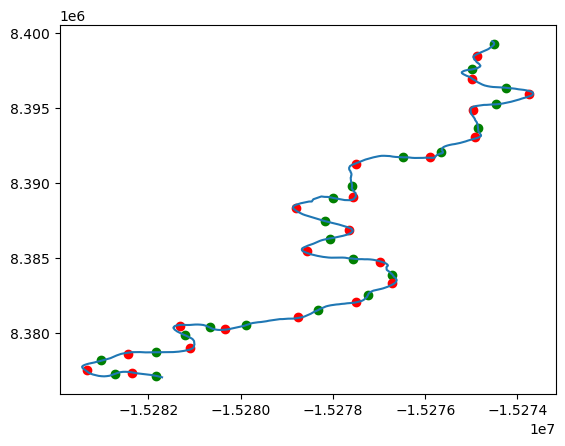

In [21]:
plt.plot(*R.geometry.xy)
for i in range(len(A[1])):
    plt.scatter(*A[1][i].xy, c = 'g')
for i in range(len(A[3])):
    plt.scatter(*A[3][i].xy, c = 'red')
plt.show()


In [3]:
results_created = glob.glob(directory + 'results/all/*_10_20*2.csv')
results_created.sort()
# results_created

In [4]:
def change_str_list(df, cols):
    for index, row in df.iterrows():
            for col in cols:
                if col == 'mOISlope':
                    newRow = df.loc[index]
                    vals   = newRow.outSlope
                    # print(1, vals)
                    if isinstance(vals, np.ndarray) == False:
                        vals = []
                    # print(2, vals)
                    val2 = newRow.innSlope
                    if isinstance(val2, list):
                        # print(vals, val2)
                        vals.extend(val2)

                    df.loc[index, col] = np.nanmean(vals)
                else:
                     
                    try:
                        if isinstance(row[col] ,str) == True:
                            # print(1)
                            R = row[col]
                            R = R.replace('nan', '99999') 
                            listVal = ast.literal_eval(R)

                            # check if slope val is nested list
                            if isinstance(listVal[0], list):
                                listVal = listVal[0]
                            

                            # check if slope val is single value --> not a list
                            if isinstance(listVal, int):
                                listVal = [listVal]
                            # print(col, listVal)
                            
                            if col == 'CDists': #change after new run with correct distance values
                                listVal = np.array([np.nan])
                            else:
                                listVal = np.array(listVal)
                            vals = listVal
                            
                            vals = vals.astype(float)
                            vals[vals == 99999] = np.nan
                            # print(4, vals)
                            
                            # df.loc[index, col]    = vals
                            df.at[index, col] = vals
                            # print(4.1)
                            df.loc[index, f'm{col}']   = np.nanmean(vals)
                            # print(4.2)
                            df.loc[index, f'max{col}'] = np.nanmax(vals)
                            # print(5)
                        else:
                            vals = np.nan
                            df.loc[index, f'{col}']    = vals
                            df.loc[index, f'm{col}']   = vals
                            df.loc[index, f'max{col}'] = vals

                    except:
                        print('except??')
                        df.at[index, f'{col}']     = np.nan
                        df.loc[index, f'm{col}']   = np.nan
                        df.loc[index, f'max{col}'] = np.nan

    return df

In [5]:
def open_all_files(save_all, save_individual, FA, F_slice):
    for i in range(len(FA)):
        fa = FA[i][F_slice[0]:F_slice[1]]
        print(fa)
        # print(fa[i])
        
        df = open_mg_file(FA[i], 'EPSG:3857')

        
        
        df = change_str_list(df, ['outSlope', 'innSlope', 'outPR', 'innPR', 'CDists', 'mOISlope'])
        df.loc[:, 'File'] = fa
        df['outSlopeRatio'] = (df['moutSlope'] - df['slope']) / (((df['moutSlope'] + df['slope'])/2))
        df['innSlopeRatio'] = (df['minnSlope'] - df['slope']) / (((df['minnSlope'] + df['slope'])/2))
        
        if i > 0:
            dfT = pd.concat([dfT, df], axis = 0, join = 'outer')
        else:
            dfT = df
        cs = 0
        for c in df.columns:
            if c[0:-1] == 'Cycle':
                cs += 1
        print(cs)

    
    if save_all == True:
        dfT.to_csv(directory + 'results/all/All_conf.csv')

    return dfT
df = open_all_files(False, False, results_created  , [-17, -12])


af_11
2
af_12
1
af_13
7
af_14
9
af_15
0
af_16
1
af_17
3
af_18
3
as_31
9
as_32
9
as_33
4
as_34
9
as_35
9
as_36
1
as_41
1
as_42
4
as_43
9
as_44
9
as_45
9
as_46
2
as_47
0
as_48
1
as_49
1
eu_21
1
eu_22
5
eu_23
9
eu_24
1
eu_25
1
eu_26
4
eu_27
0
eu_28
7
eu_29
3
na_71
3
na_72
2
na_73
2
na_74
5
na_75
2
na_76
0
na_77
2
na_78
3
na_81
4
na_82
9
na_83
3
na_84
0
na_85
1
na_86
0
na_91
0
oc_51
2
oc_52
5
oc_53
3
oc_55
0
oc_56
3
oc_57
1
sa_61
8
sa_63
2
sa_64
3
sa_65
3
sa_66
2
sa_67
3


In [6]:
dfT = df.copy()



In [10]:
for c in dfT.columns:
    print(c)


x
y
reach_id
reach_len
n_nodes
wse
wse_var
width
width_var
facc
n_chan_max
n_chan_mod
obstr_type
grod_id
hfalls_id
slope
dist_out
lakeflag
max_width
n_rch_up
n_rch_dn
rch_id_up
rch_id_dn
swot_orbit
swot_obs
type
river_name
edit_flag
trib_flag
geometry
Cycle1
Cycle2
up_segment
dn_segment
single_up
single_dn
az_up
az_dn
order
LCheck
rch_ids_up
rch_ids_dn
node_mwm
min_len
short
widthRatio
infP10_2
infP10_5
infP20_2
infP20_5
apex10_2
apex10_5
apex20_2
apex20_5
apexP10_2
apexP10_5
apexP20_2
apexP20_5
apexV10_2
apexV10_5
apexV20_2
apexV20_5
outSlope
innSlope
outPR
innPR
CDists
sin10_2
sin10_5
sinReg10_2
sinReg10_5
sin20_2
sin20_5
sinReg20_2
sinReg20_5
vc
moutSlope
maxoutSlope
minnSlope
maxinnSlope
moutPR
maxoutPR
minnPR
maxinnPR
mCDists
maxCDists
mOISlope
File
outSlopeRatio
innSlopeRatio
Cycle3
Cycle4
Cycle5
Cycle6
Cycle7
Cycle8
Cycle9
Cycle10
Cycle11
Cycle12
Cycle13
Cycle14


In [ ]:
dfT[dfT.Cycle1.isna() == False]

,x,y,reach_id,reach_len,n_nodes,wse,wse_var,width,width_var,facc,...,Cycle5,Cycle6,Cycle7,Cycle8,Cycle9,Cycle10,Cycle11,Cycle12,Cycle13,Cycle14
320,35.987075,4.428984,11544000011,5508.346222,22,361.0,0.000000,94.959427,897.226013,80432.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,35.978774,4.502838,11544000021,13334.364538,66,362.0,0.201779,60.000000,573.549757,80247.226562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,35.944268,4.472230,11544000041,11317.073449,33,361.0,0.226306,399.000000,40581.592782,80249.789062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,35.942716,4.517851,11544000051,11317.073449,23,362.0,0.000000,439.500000,87343.943317,80219.020266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,35.959319,4.550375,11544000071,1501.657199,7,362.0,0.000000,2.700000,7.075348,23946.800062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,-79.886810,-1.730657,67202400041,10593.179856,52,6.8,0.002868,60.000000,212.621754,4837.828613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,-79.868749,-1.675072,67202400051,10652.143520,52,6.8,0.000000,54.000000,225.619739,4837.828613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,-79.862614,-1.611091,67202400061,9083.301166,45,7.0,0.001748,63.000000,326.046066,1001.636353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,-79.843140,-1.653834,67202400081,6024.344995,31,6.8,1.790753,63.000000,287.615488,1135.770020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.head(5)

,x,y,reach_id,reach_len,n_nodes,wse,wse_var,width,width_var,facc,...,Cycle5,Cycle6,Cycle7,Cycle8,Cycle9,Cycle10,Cycle11,Cycle12,Cycle13,Cycle14
0,42.582381,-0.135846,11410000021,10528.796398,52,1.700000,0.000000,94.0,495.646181,740052.747031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42.594848,-0.091447,11410000031,10471.954291,52,1.700000,0.030291,84.0,230.260156,739619.603428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42.608105,-0.040976,11430000041,11299.964708,56,5.200000,1.325533,77.0,438.047619,739160.208697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42.654059,-0.021237,11430000051,10974.831867,55,7.400000,0.065843,63.0,300.498249,738668.729254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.706236,0.037553,11430000011,18899.910553,94,7.700000,0.000000,63.0,441.705080,510965.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40.526078,4.694529,11444300231,18805.312710,93,384.200012,39.722815,67.0,478.132261,36164.498104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,40.435761,4.756996,11444300241,10485.676455,52,400.100006,15.638291,80.0,417.919834,35497.620833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,40.368538,4.796136,11444300251,10504.190362,52,411.899994,16.872250,54.0,380.717938,35109.619512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,40.285107,4.826674,11444300261,11677.961581,58,426.899994,60.713245,36.0,72.347412,34731.318224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Open input files for check

In [ ]:
F = glob.glob(directory + 'input/SWOT_vector/*.shp')
for f in range(len(F)):
    D = gpd.read_file(F[f])
    D = D[(D['type'] == 1) & (D.lakeflag == 0)]

    cont = F[f][-29:-27]
    cont_reg = F[f][-10:-8]
    D.loc[:, 'File'] = f'{cont}_{cont_reg}'
    
    if f == 0:
        dfInput = D.copy()
    else:
        dfInput = pd.concat([dfInput, D])
    


In [ ]:
F = glob.glob(directory + 'results/new_segments/vector/*.shp')
for f in range(len(F)):
    D = gpd.read_file(F[f])

    D.loc[:, 'File'] = F[f][-29:-24]
    if f == 0:
        dfNS = D.copy()
    else:
        dfNS = pd.concat([dfNS, D])
    


In [ ]:
print(dfInput.shape[0], dfNS.shape[0], dfT.shape[0])

158070 157570 157570


In [ ]:
print(f'Number of tiles: {len(dfT.File.unique())}')
print(f'Number of reaches: {dfT.shape[0]}')

Number of tiles: 60
Number of reaches: 157570


# Analyse Confiment slopes

In [ ]:
totalOuter = (~dfT.outSlope.isna()).sum()
totalInner = (~dfT.innSlope.isna()).sum()


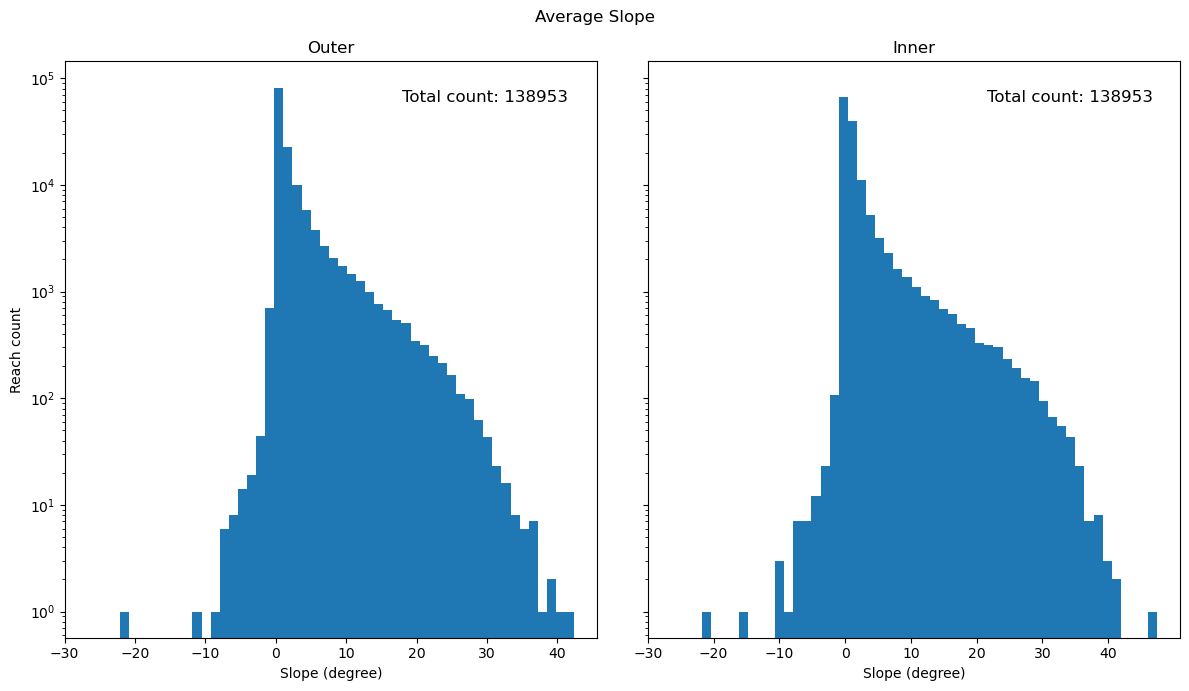

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,7), sharey=True)
ax[0].hist(np.rad2deg(np.arctan(dfT.moutSlope)), bins = 50)
ax[1].hist(np.rad2deg(np.arctan(dfT.minnSlope)), bins = 50)
ax[0].set_title('Outer')
ax[1].set_title('Inner')
ax[0].set_ylabel('Reach count')
ax[0].set_xticks(range(-30, 50, 10))
ax[1].set_xticks(range(-30, 50, 10))
ax[0].set_xlabel('Slope (degree)')
ax[1].set_xlabel('Slope (degree)')
f.suptitle('Average Slope')
ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].text(-0.15, 0.95, f'Total count: {totalOuter}', 
         transform=plt.gca().transAxes, 
         ha='right', va='top', 
         fontsize=12, color='black')

ax[1].text(0.95, 0.95, f'Total count: {totalInner}', 
         transform=plt.gca().transAxes, 
         ha='right', va='top', 
         fontsize=12, color='black')


plt.tight_layout()
plt.show()


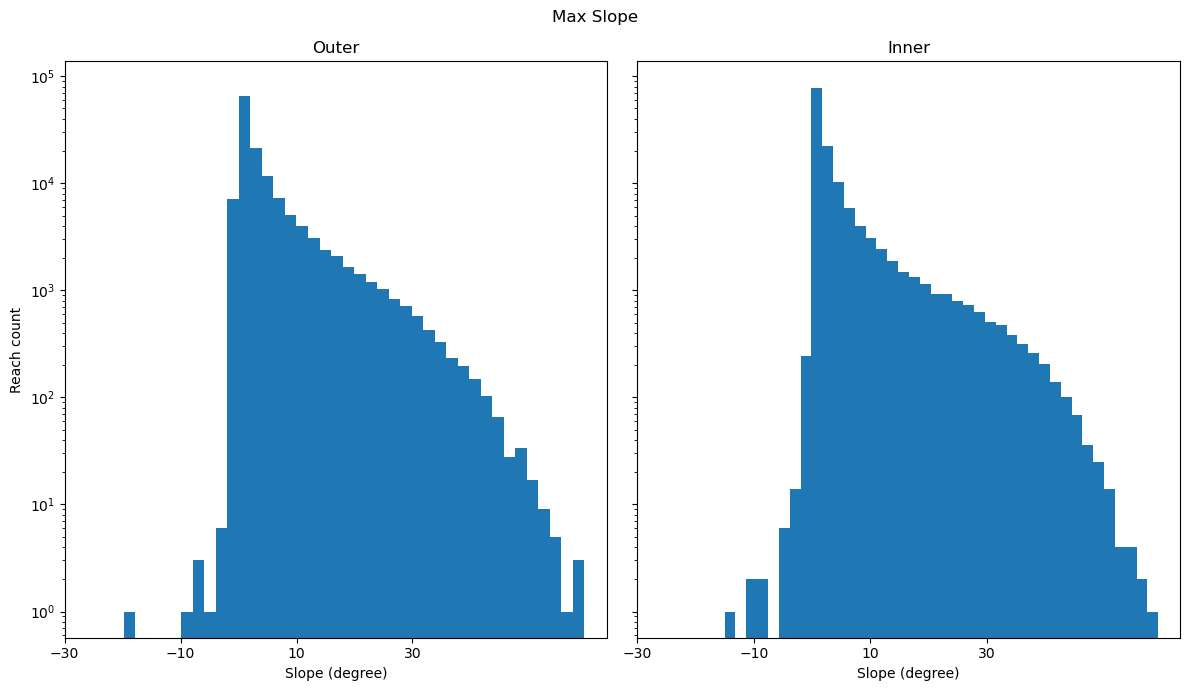

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,7), sharey=True)
ax[0].hist(np.rad2deg(np.arctan(dfT.maxoutSlope)), bins = 40)
ax[1].hist(np.rad2deg(np.arctan(dfT.maxinnSlope)), bins = 40)
ax[0].set_title('Outer')
ax[1].set_title('Inner')
ax[0].set_ylabel('Reach count')
ax[0].set_xticks(range(-30, 40, 20))
ax[1].set_xticks(range(-30, 40, 20))
ax[0].set_xlabel('Slope (degree)')
ax[1].set_xlabel('Slope (degree)')
f.suptitle('Max Slope')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
abs(dfT.outSlope - dfT.innSlope)

0      [0.0024128048046033823, 0.0017440113899557796,...
1      [0.00337425281744911, 0.00020912999948111068, ...
2      [0.0004458001415288532, 0.0008505232444354718,...
3      [0.002604154639563109, 0.00015290921317935292,...
4      [0.0015526454185633152, 0.0004961760875627336,...
                             ...                        
750    [0.03187009804251198, 0.012735831088400915, 0....
751    [0.1857604714604006, 0.004690149859186296, 0.0...
752    [0.07515104977014178, 0.016901073927544516, 0....
753    [0.2064227770648041, 0.04687913298503159, 0.06...
754    [0.03237016891495892, 0.013843524265996433, 0....
Length: 140747, dtype: object

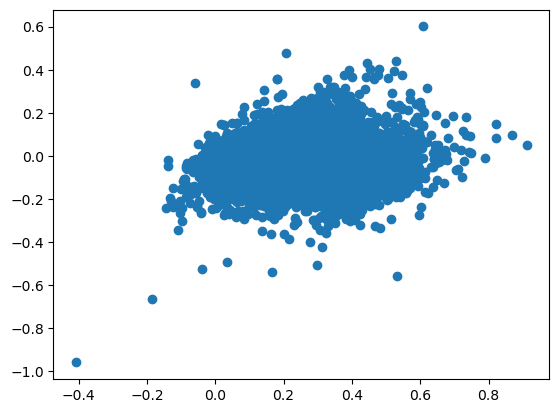

In [ ]:
plt.scatter( dfT.mOISlope,dfT.moutSlope - dfT.minnSlope)

In [ ]:
for index, row in dfT.iterrows():
    if isinstance(row.outPR, float) == False:
        dfT.loc[index, 'outPRange'] = row.outPR.max() - row.outPR.min()
    if isinstance(row.innPR, float) == False:
        dfT.loc[index, 'innPRange'] = row.innPR.max() - row.innPR.min()

AttributeError: 'str' object has no attribute 'max'

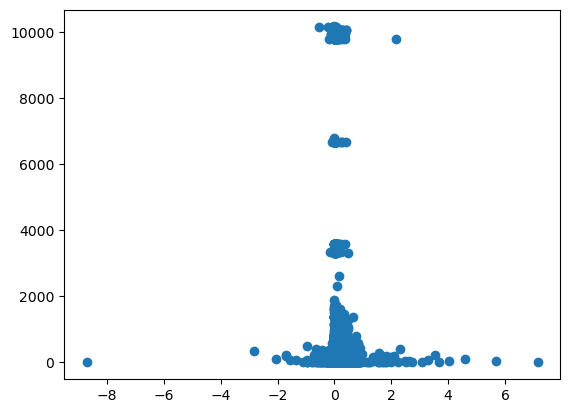

In [ ]:
T = dfT[dfT.outPRange > 0]

plt.scatter(T.moutSlope, T.outPRange)
# plt.yscale('log')

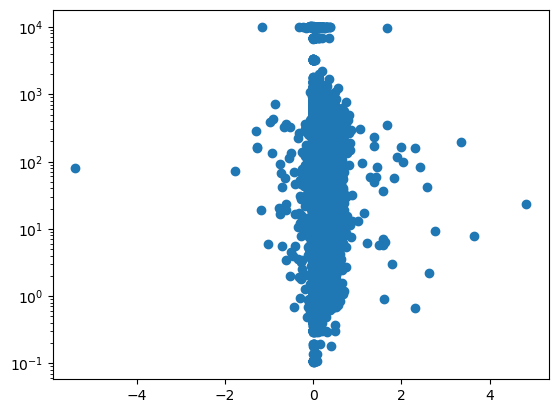

In [ ]:
T = dfT[dfT.innPRange > 0]

plt.scatter(T.minnSlope, T.innPRange)
plt.yscale('log')

# Check NaN values inflection and confinement

In [ ]:
F = dfT.File.unique()
print(f'Total inf missing: {dfT[(dfT.sin10_2.isna())].shape[0]}')
for i in range(len(F)):
    DF = dfT[dfT.File == F[i]]
    D = DF[(DF.sin10_2.isna())]
    print(D.shape[0], F[i])
    if i == 0:
        df_emptyInf = D
    else:
        df_emptyInf = pd.concat([df_emptyInf, D])

Total inf missing: 1889
10 af_11
38 af_12
34 af_13
45 af_14
1 af_15
2 af_16
15 af_17
6 af_18
21 as_31
13 as_32
22 as_33
11 as_34
34 as_35
0 as_36
34 as_41
43 as_42
369 as_43
66 as_44
282 as_45
12 as_46
0 as_47
3 as_48
2 as_49
13 eu_21
60 eu_22
43 eu_23
25 eu_24
17 eu_25
11 eu_26
0 eu_27
23 eu_28
1 eu_29
45 na_71
51 na_72
31 na_73
54 na_74
15 na_75
1 na_76
11 na_77
13 na_78
16 na_81
8 na_82
33 na_83
0 na_84
6 na_85
0 na_86
1 na_91
9 oc_51
21 oc_52
15 oc_53
0 oc_55
20 oc_56
5 oc_57
41 sa_61
113 sa_62
33 sa_63
68 sa_64
7 sa_65
11 sa_66
5 sa_67


In [ ]:
dfT[dfT.apexP10_2.isna()].shape[0]

1889

In [ ]:
F = dfT.File.unique()
Total = dfT[(dfT.outSlope.isna()) & (dfT.innSlope.isna()) & (dfT.sin10_2.isna() == False)].shape[0]
print(f'Total Na values: {Total}')
C = 0
for i in range(len(F)):
    DF = dfT[dfT.File == F[i]]
    D = DF[(DF.outSlope.isna()) & (DF.innSlope.isna()) & (DF.sin10_2.isna() == False)]
    print(D.shape[0], F[i])
    C += D.shape[0]

df_emptyConf = dfT[(dfT.outSlope.isna()) & (dfT.innSlope.isna()) & (dfT.sin10_2.isna() == False)]
print(df_emptyConf.shape[0])

Total Na values: 6537
48 af_11
49 af_12
169 af_13
65 af_14
9 af_15
21 af_16
21 af_17
70 af_18
471 as_31
102 as_32
73 as_33
122 as_34
691 as_35
6 as_36
14 as_41
152 as_42
203 as_43
197 as_44
146 as_45
37 as_46
0 as_47
17 as_48
2 as_49
9 eu_21
95 eu_22
17 eu_23
16 eu_24
7 eu_25
32 eu_26
2 eu_27
115 eu_28
13 eu_29
33 na_71
29 na_72
42 na_73
142 na_74
75 na_75
7 na_76
25 na_77
14 na_78
93 na_81
40 na_82
6 na_83
0 na_84
1 na_85
0 na_86
0 na_91
105 oc_51
182 oc_52
218 oc_53
4 oc_55
119 oc_56
4 oc_57
334 sa_61
1611 sa_62
92 sa_63
321 sa_64
12 sa_65
9 sa_66
28 sa_67
6537


# Investigate get_orthog code

In [ ]:
cont = 'af'
reg = '16'
Tile = f'{cont}_{reg}'


In [ ]:

df_emptyConf_Tile = df_emptyConf[df_emptyConf.File == Tile]
df_emptyConf_Tile=df_emptyConf_Tile.reset_index()
print(df_emptyConf_Tile.shape[0])
df_emptyConf_Tile.head()

In [ ]:
projection = 'EPSG:3857'

In [ ]:
node_file   = glob.glob(directory + f'input/SWOT_nodes/{cont}*{reg}_*shp')[0]
df_node = gpd.read_file(node_file)
df_node = df_node.to_crs(projection)

df_node = df_node[(df_node['type'] == 1) & (df_node.lakeflag == 0) & (df_node.manual_add == 0)]

In [ ]:
from get_orthogonals import get_orthogonals
%load_ext autoreload
%autoreload 2

In [ ]:
int(10.2)

10

In [ ]:
D = dfT.copy()

D = D[['reach_id', 'File', 'outSlope', 'moutSlope', 'maxoutSlope','innSlope', 'minnSlope', 'maxinnSlope' ]]

In [ ]:
mids = [35200600301, 35200600481, 35200600111, 35601700131, 35133000061, 35301201151] * 50

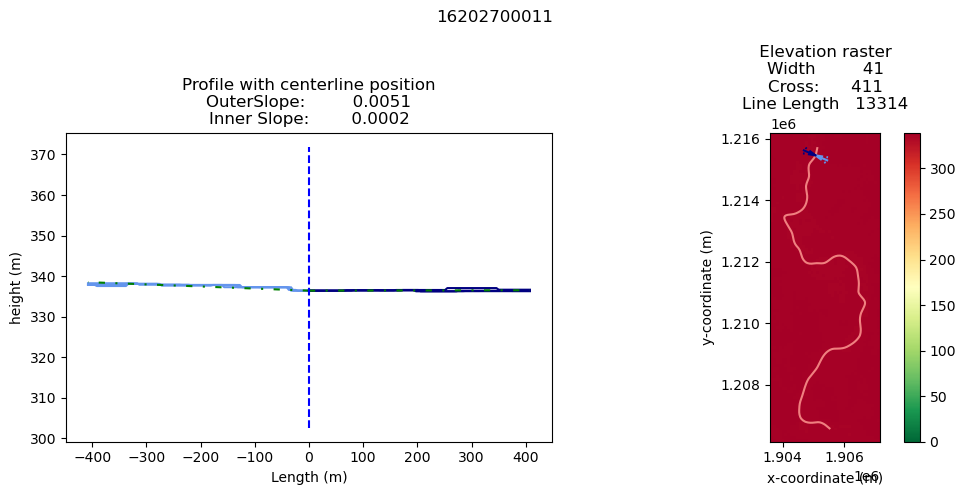

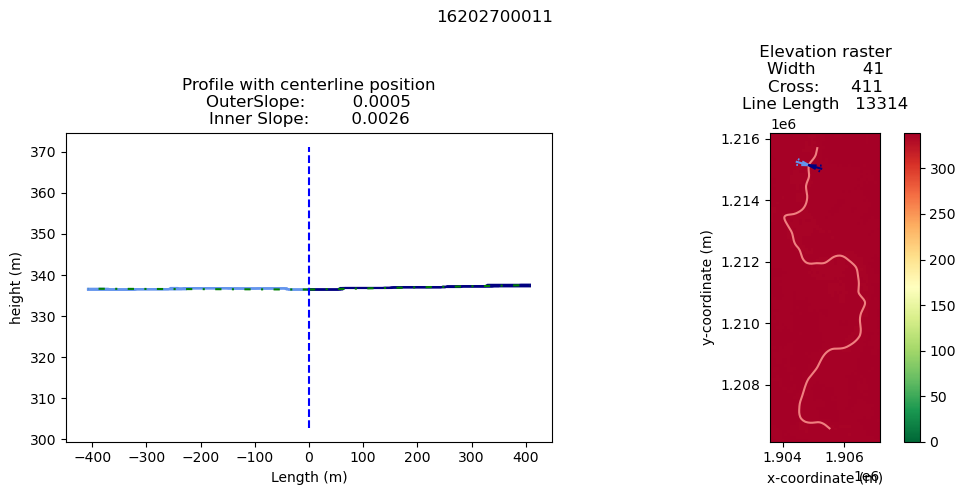

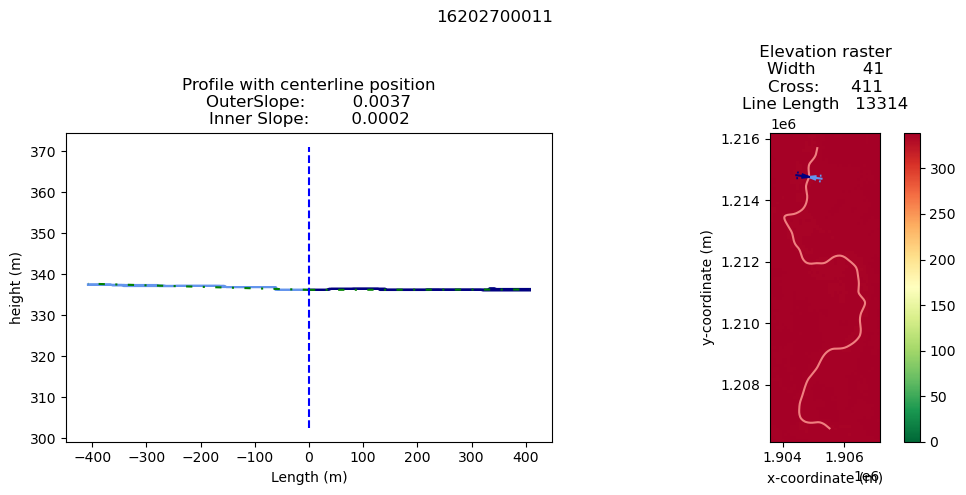

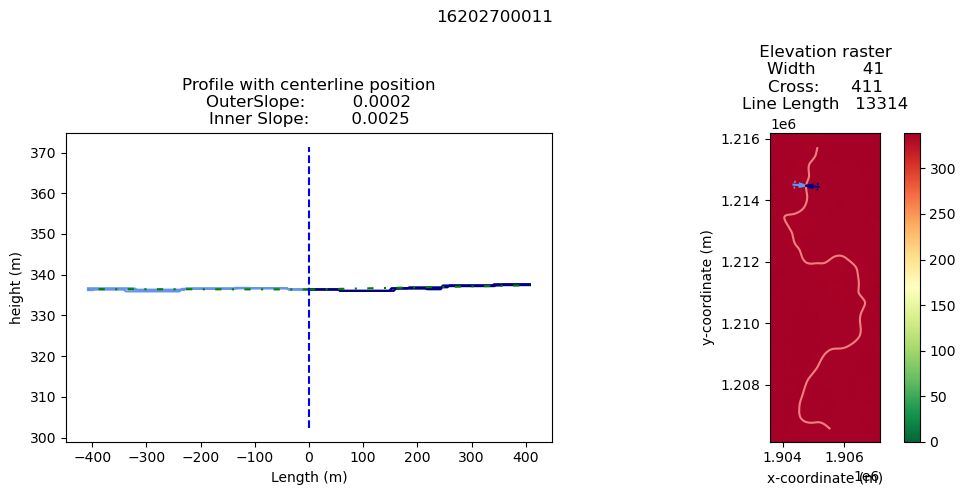

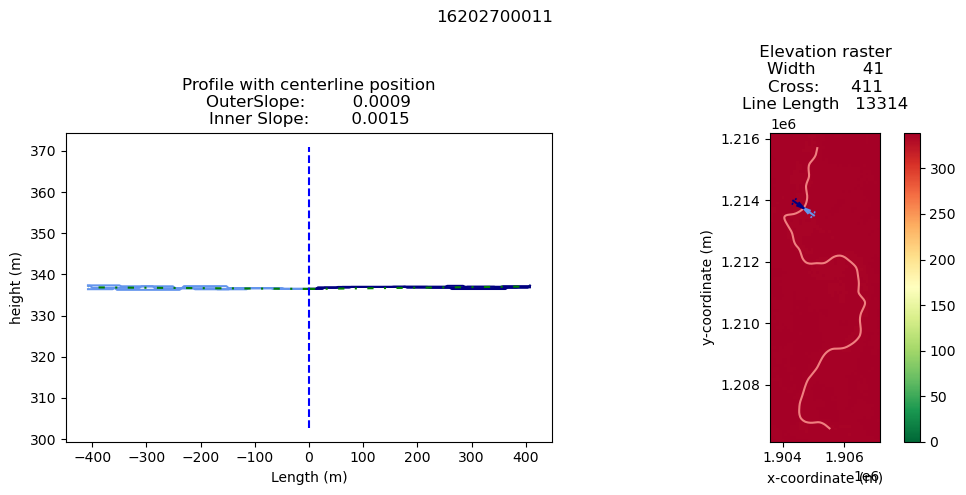

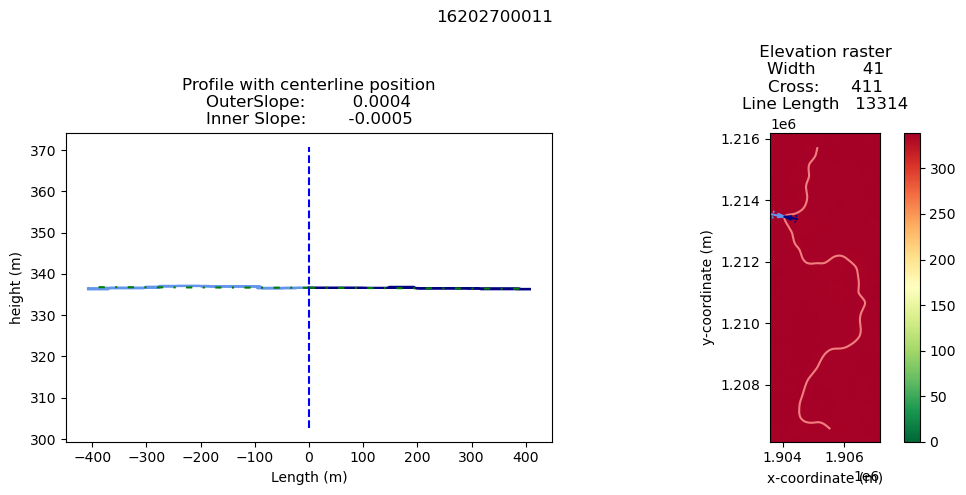

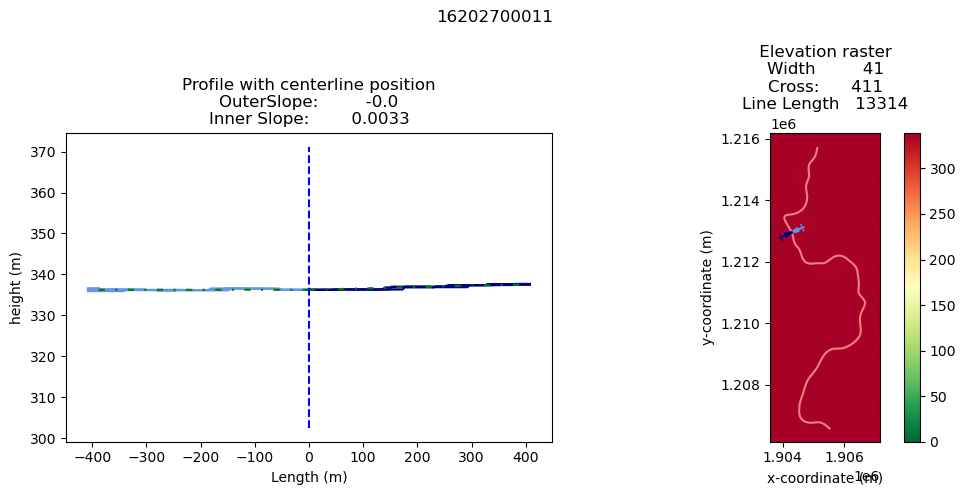

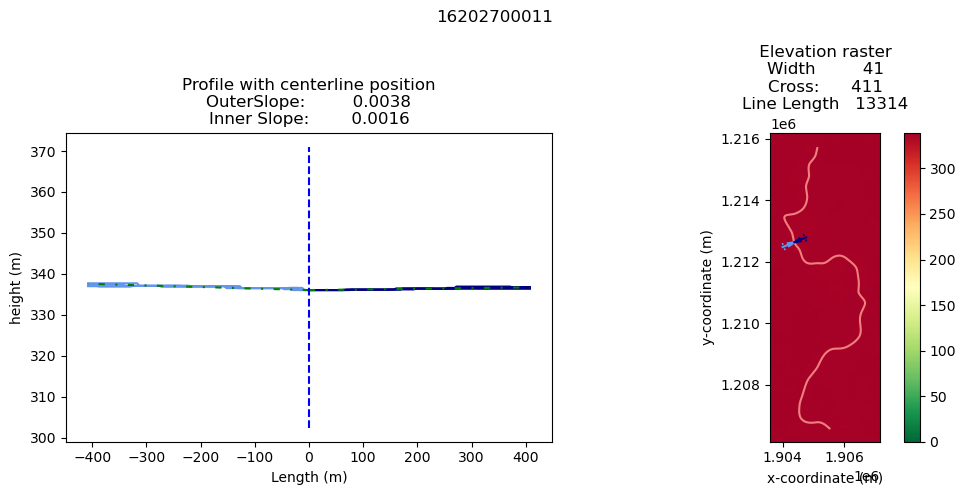

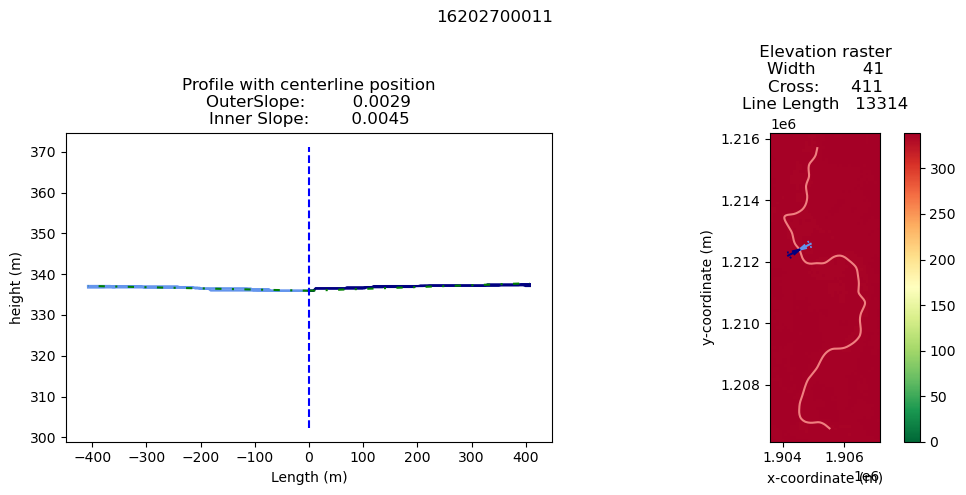

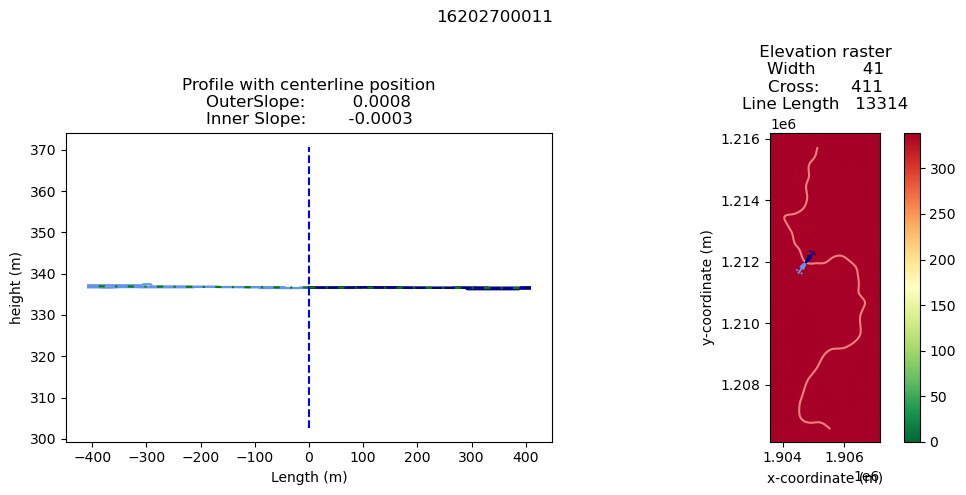

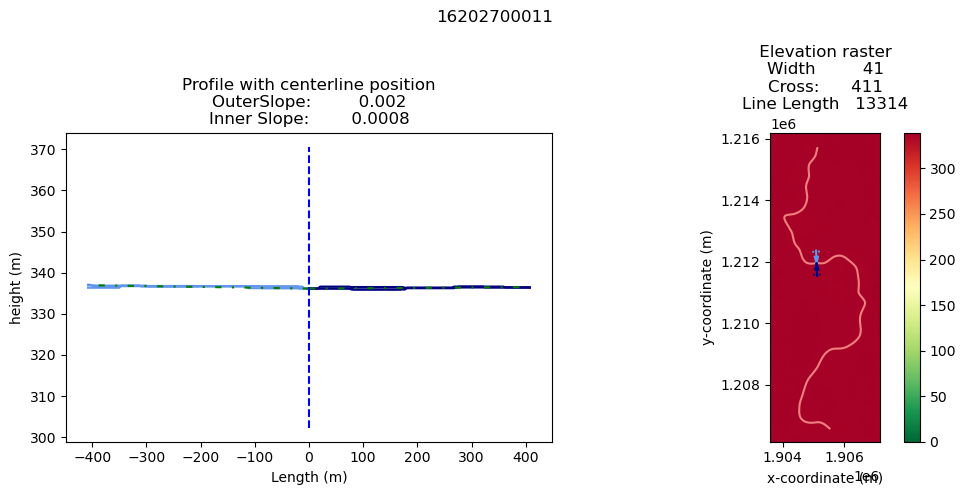

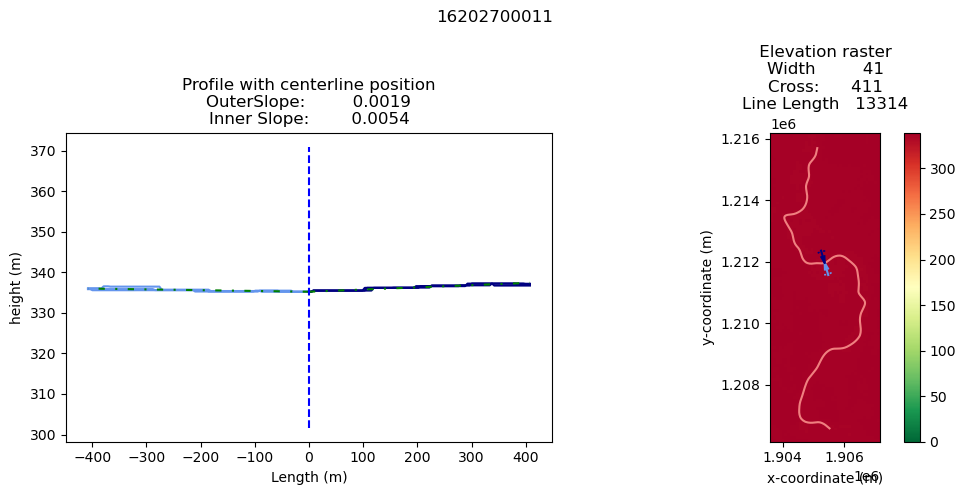

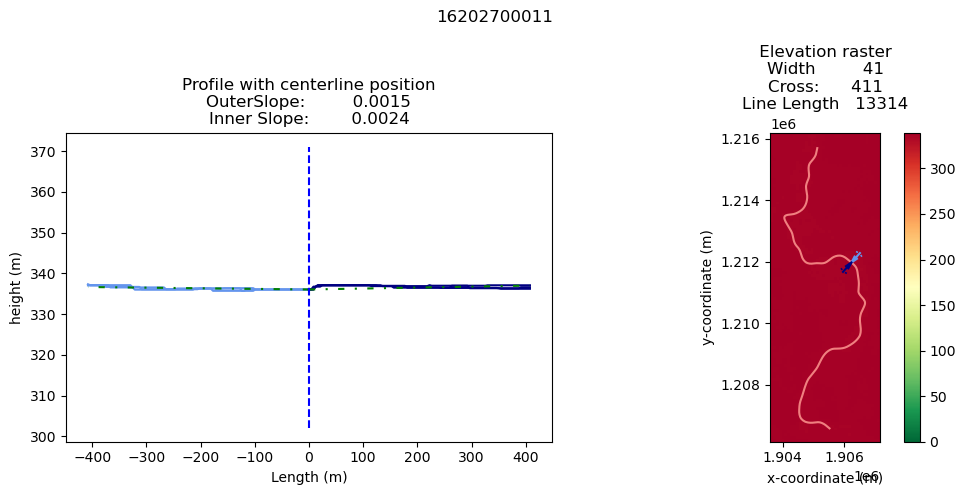

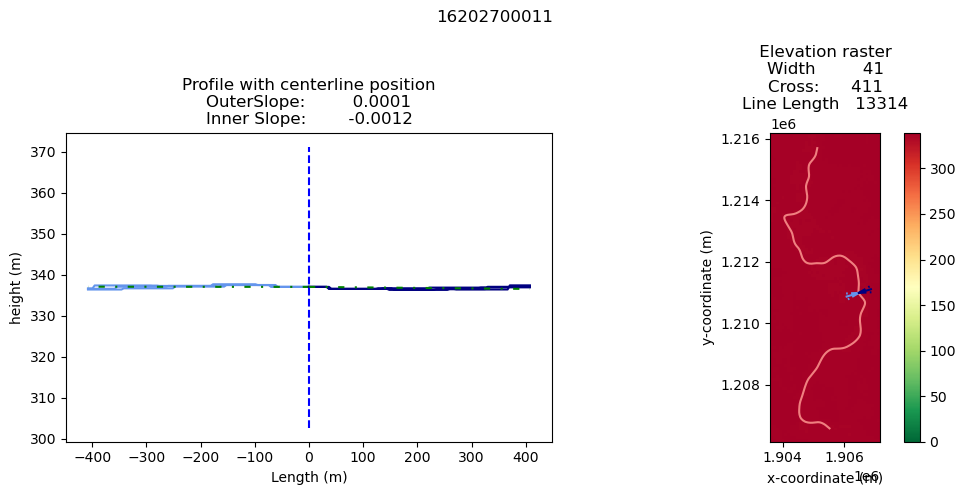

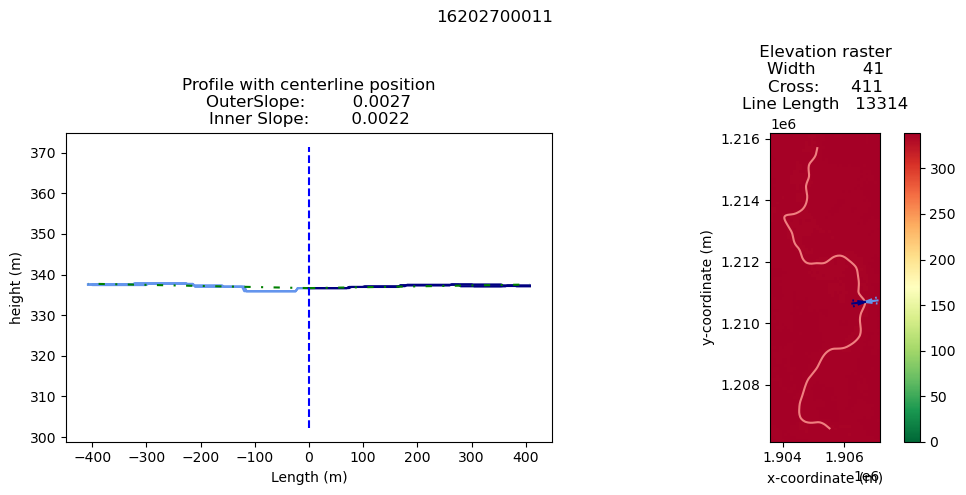

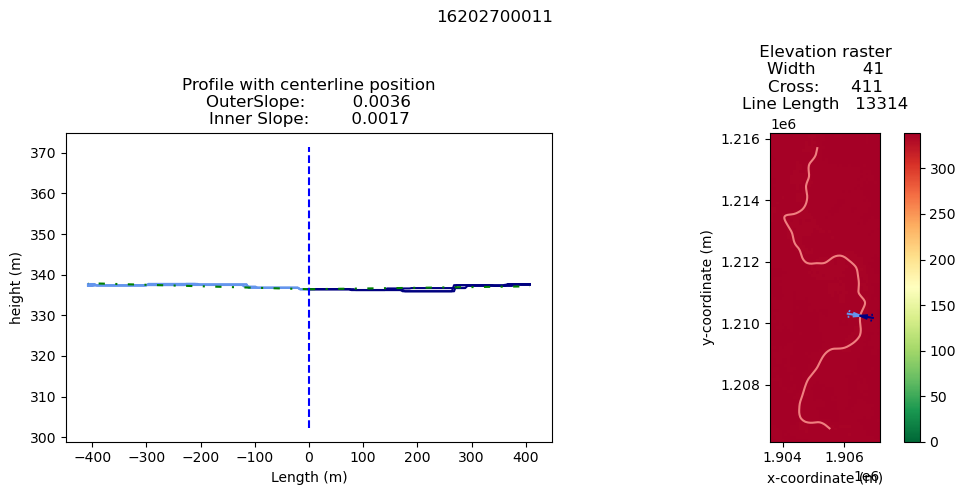

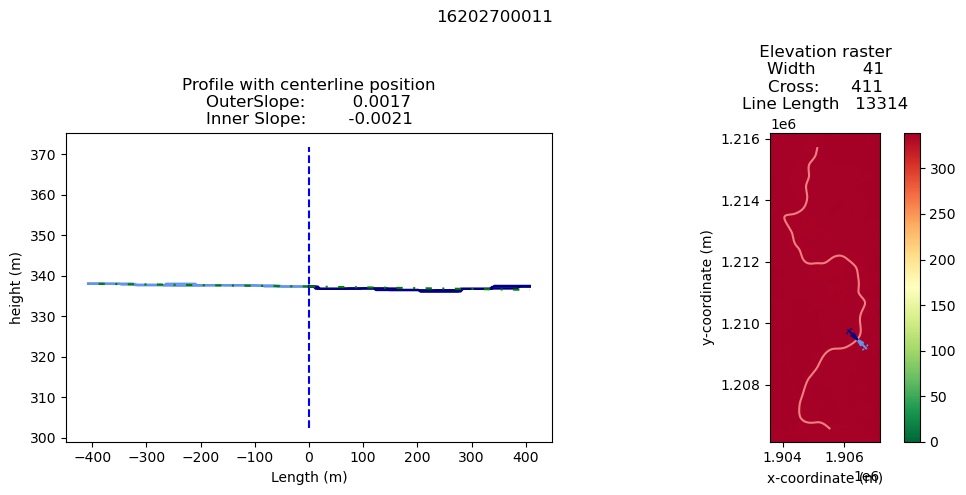

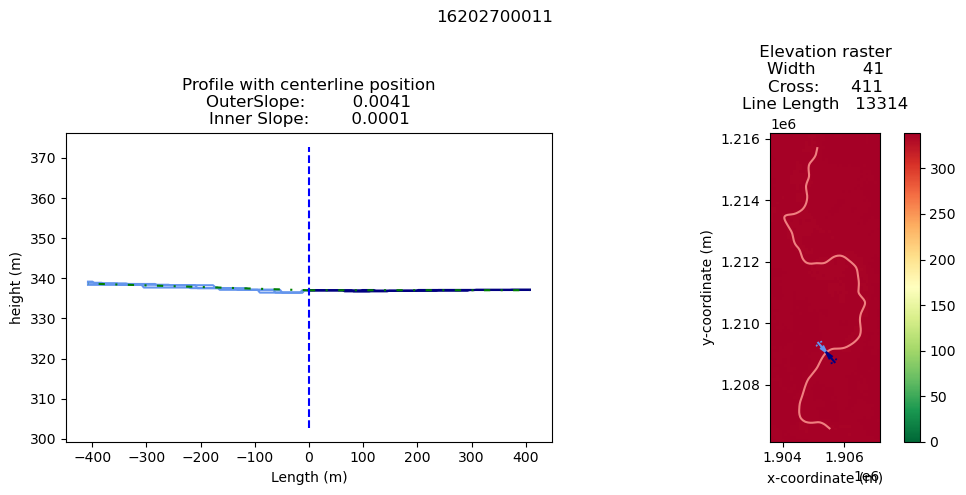

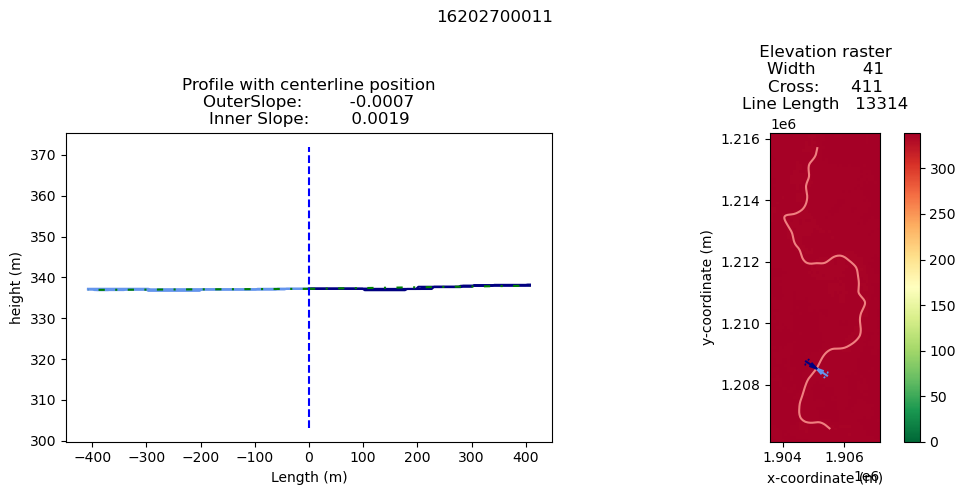

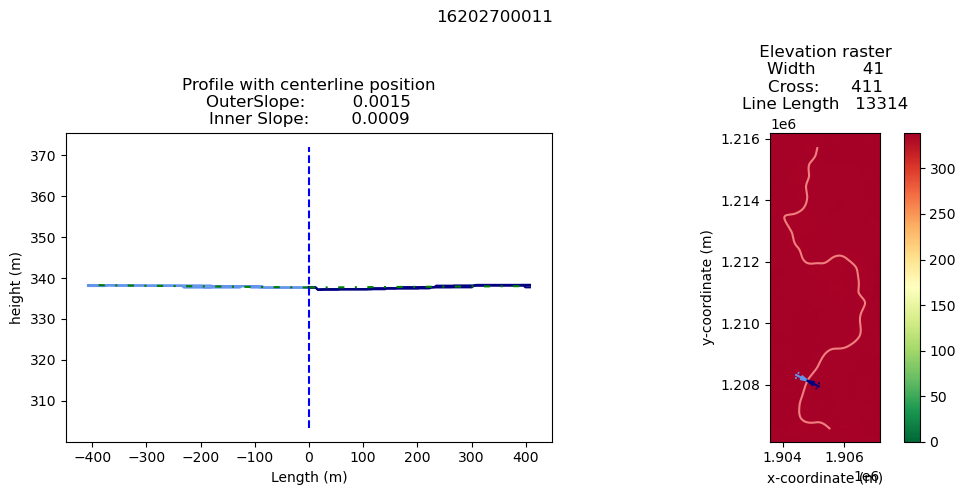

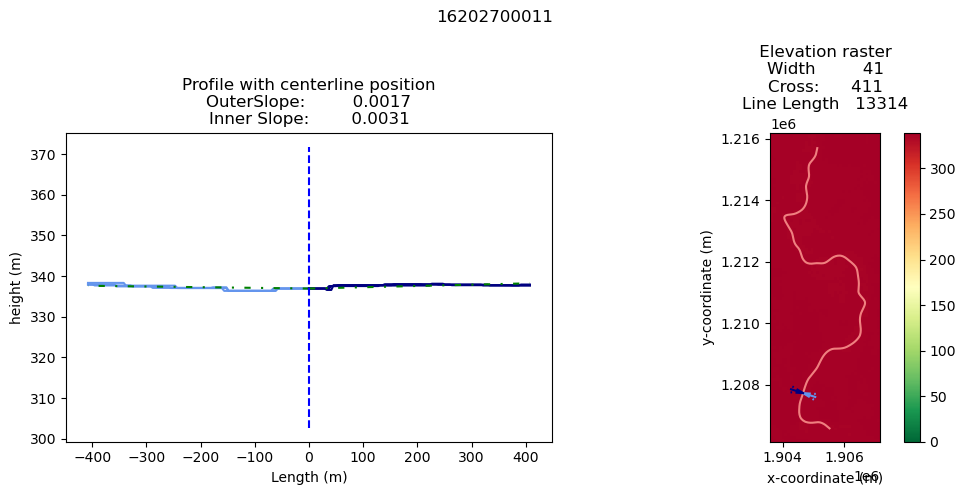

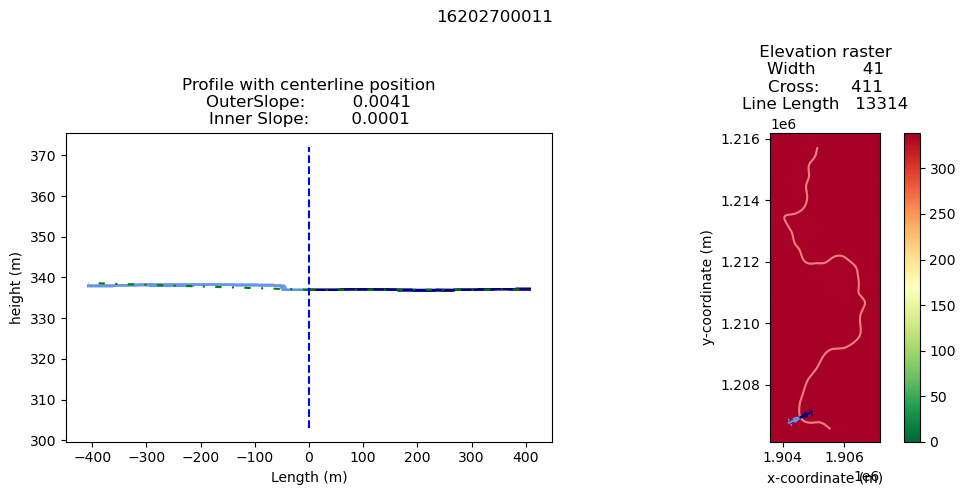

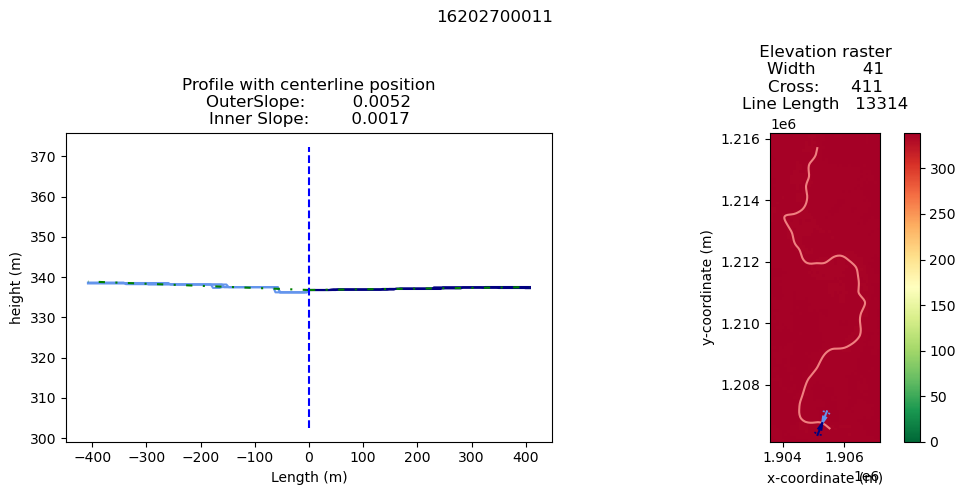

[0.005141339286654115, 0.0004791762756911477, 0.003710296237832961, 0.00018770085134411837, 0.0009343694501130442, 0.0004056672613953615, -2.499341008398203e-05, 0.0037691356475603364, 0.0028885781836142763, 0.0008037589892053435, 0.0019901744050819584, 0.0019402948749448876, 0.001491764603220597, 0.00011760961682129785, 0.0026558722894521863, 0.003613629499622209, 0.0016856810108586385, 0.004099733665208579, -0.0006572522523270645, 0.0014713708780825575, 0.0016685215329785379, 0.004084331622851218, 0.005183849650110436]
[0.00024308177652142683, 0.002648200341502858, 0.0002113017473912556, 0.002509687400102602, 0.0014565418615131059, -0.000545933418921068, 0.003294124549112877, 0.0016252515876959924, 0.004531420778493671, -0.000347815574295294, 0.0008476286981694788, 0.00540593953982735, 0.0023592269973876853, -0.0012165225328187833, 0.0021725682470046196, 0.0017328076886494077, -0.0020509733978377304, 6.968574364116028e-05, 0.0018837570902169463, 0.0008844474552358847, 0.0031497798812

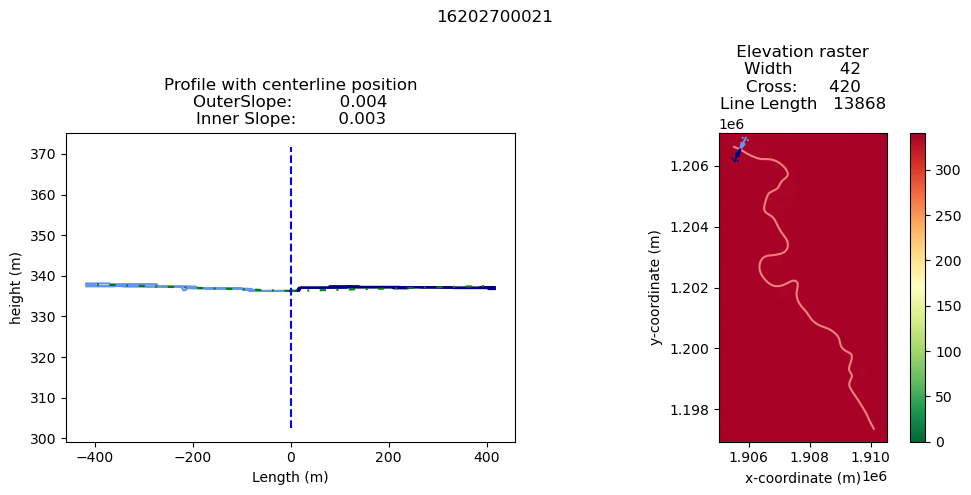

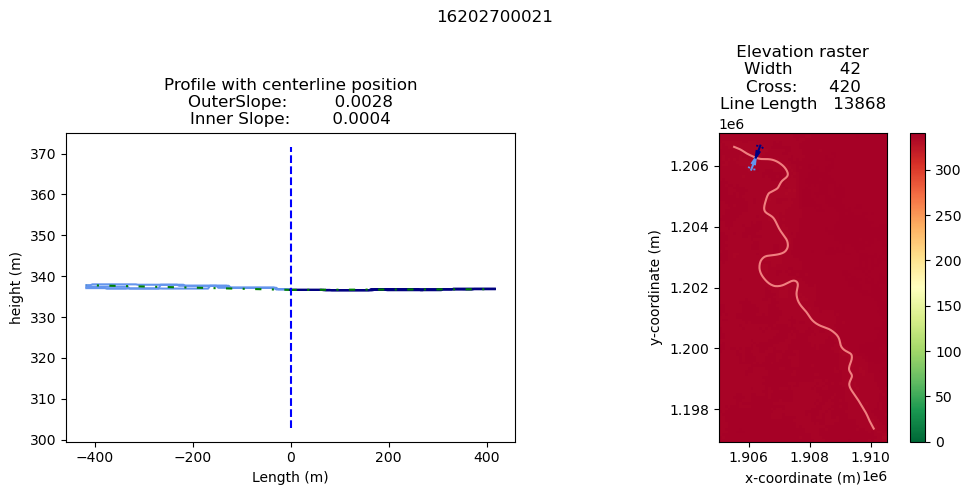

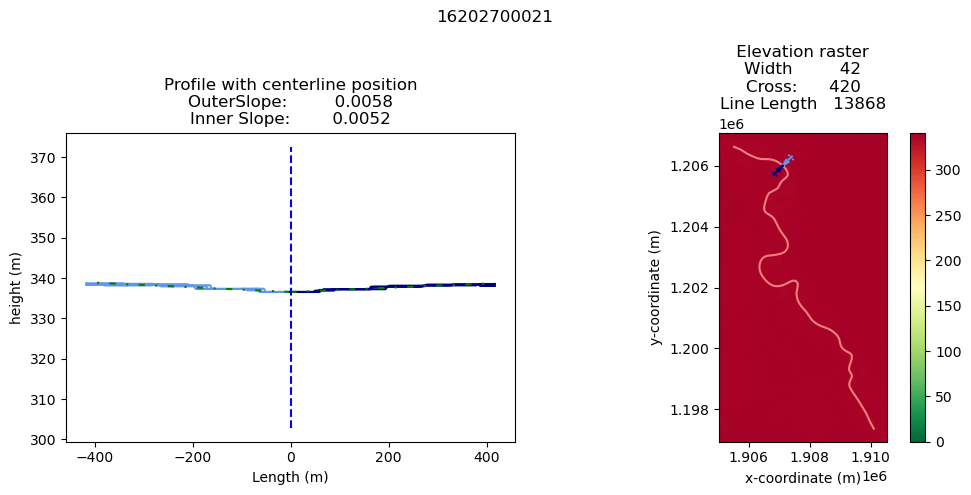

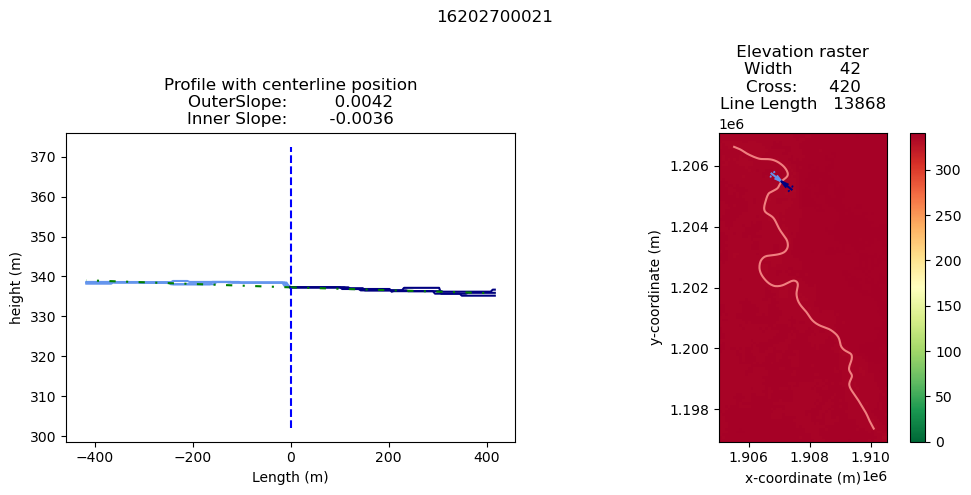

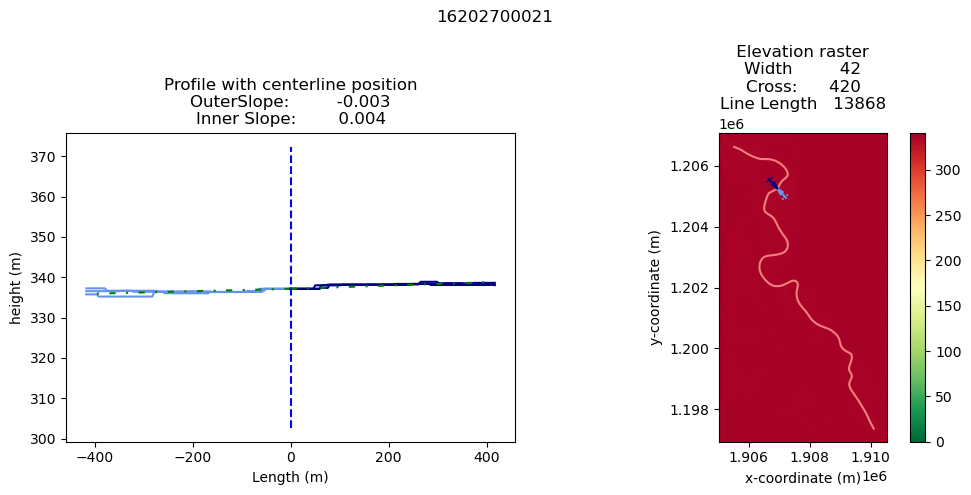

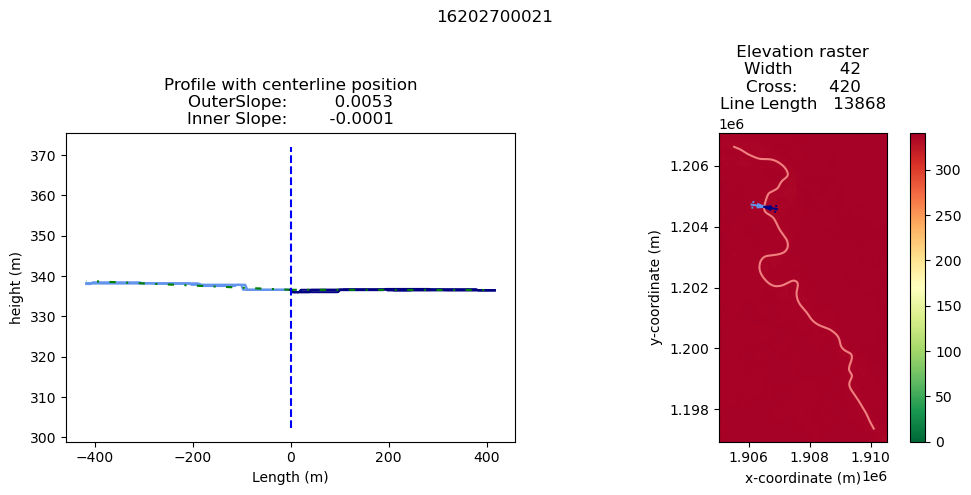

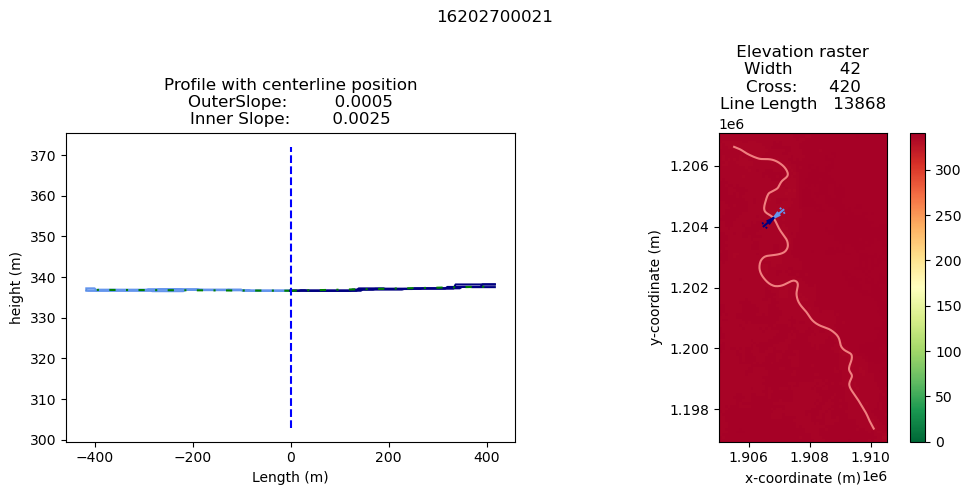

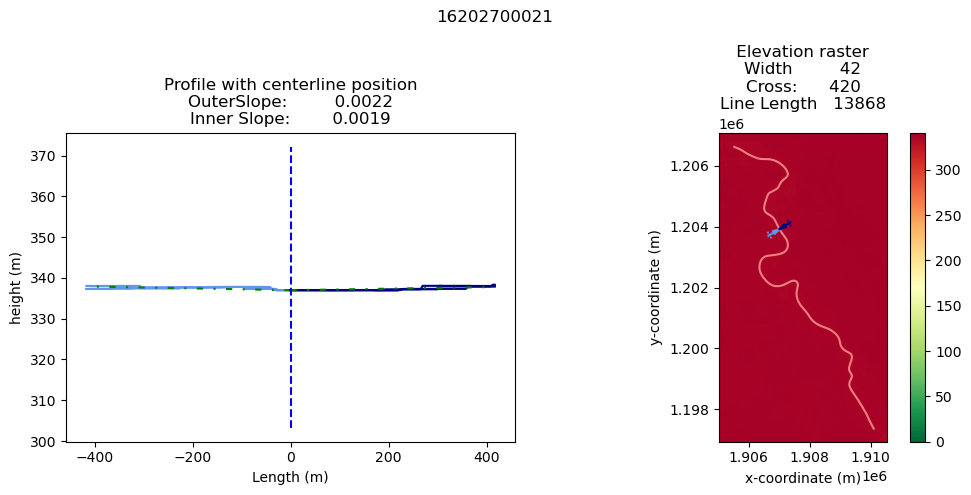

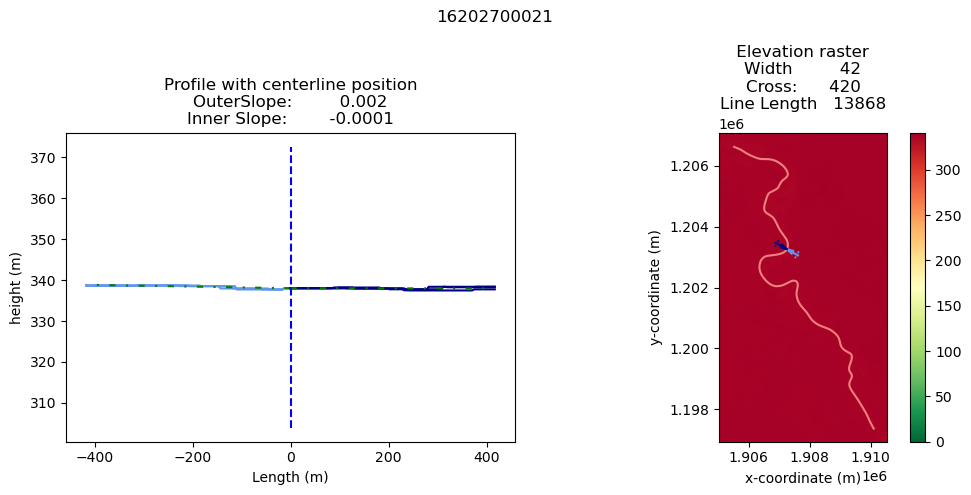

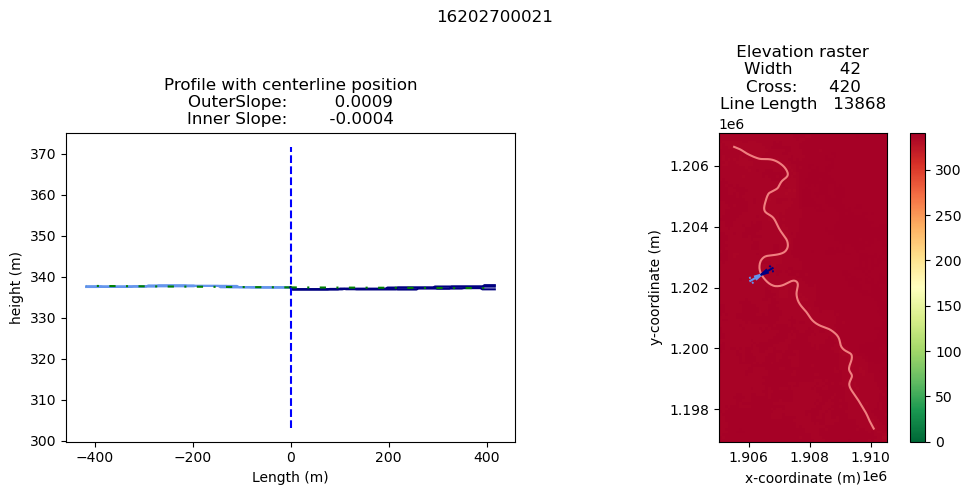

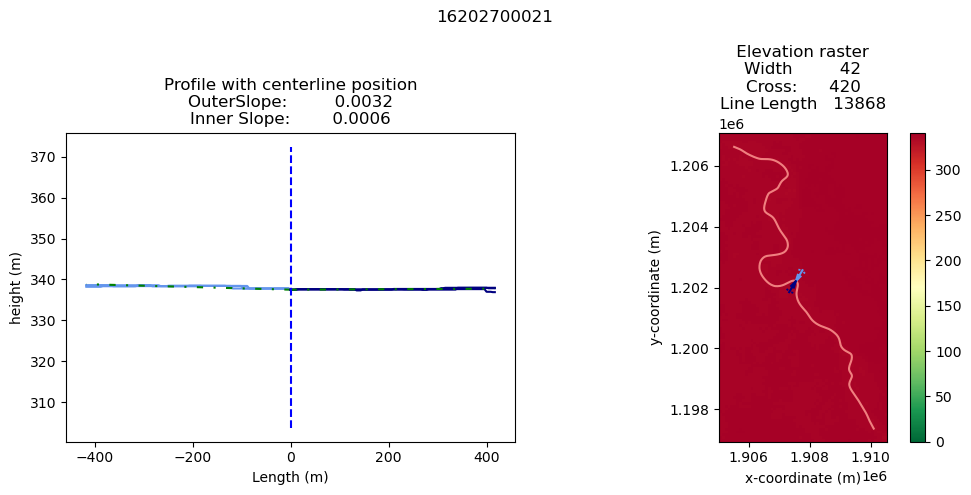

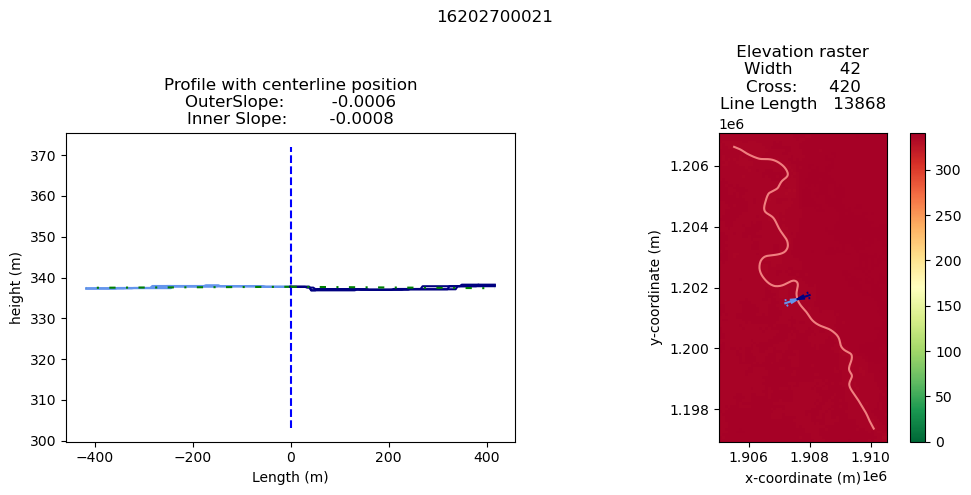

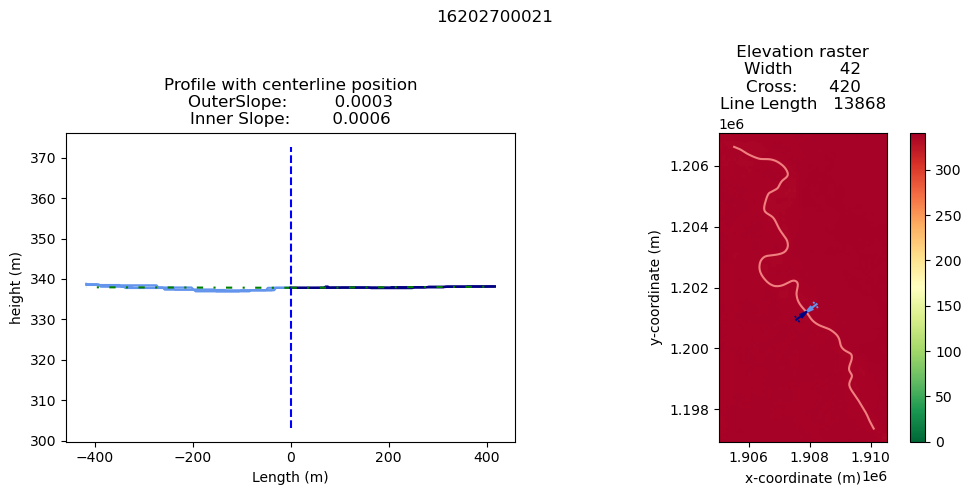

KeyboardInterrupt: 

In [ ]:
# DF = dfT.copy()
# DF = DF[DF.File == df_emptyConf_Tile.File.unique()[0]]



# for i in range(df_emptyConf_Tile.shape[0]):


#         print(f'{(i / df_emptyConf_Tile.shape[0]) *100}, {i}')
#         reach = df_emptyConf_Tile[df_emptyConf_Tile.reach_id == df_emptyConf_Tile.iloc[i].reach_id]
# I = [83300700011]
# ids = [35301201881, 35186300051, 35441000471]

# sol = []
# sil = []
# for i in ids:
for i in df.reach_id.values:
        
            reach = df[df.reach_id == i]

        # try:
            cross_slope_distance = 10
            raster = find_dem(reach, directory, projection,reach.iloc[0].max_width*cross_slope_distance, False)

            if isinstance(reach.iloc[0].apexP10_2, list) == True:

                so,si,po,pi,cd = get_orthogonals(reach,df_node, raster, projection,reach.iloc[0].max_width, cross_slope_distance
                                                 , [10, 2], directory, True,   100   )
            else:
                print('Should not happen')
                so = si = po = pi, cd = 9999

            print(so)
            print(si)
        # except:
        #     so = si = po = pi = cd = np.nan
        
        # print(so)
        # if (isinstance(so, list) == False):
        #     sol.append(i)

        # if isinstance(si, list) == False:
        #     sil.append(i)

        
        # if i == 0:
        #     df_testOrthog = pd.DataFrame({'so': so, 'si': si, 'po': po, 'pi': so, 'cd': cd})
        # else:
        #     if isinstance(so, float):
        #         D = pd.DataFrame([{ 'so': so, 'si': si, 'po': po, 'pi': so, 'cd': cd}])
        #     else:
        #         D = pd.DataFrame({ 'so': so, 'si': si, 'po': po, 'pi': so, 'cd': cd})
        #     df_testOrthog = pd.concat([df_testOrthog, D])

        
        # DF.at[reach.index[0], 'outSlope'] = so
        # DF.at[reach.index[0], 'innSlope'] = si
        # DF.at[reach.index[0], 'outPR'] = po
        # DF.at[reach.index[0], 'innPR'] = pi
        # DF.at[reach.index[0], 'CDists'] = cd
    # except:
    #     print('error', i)

    # 30.43

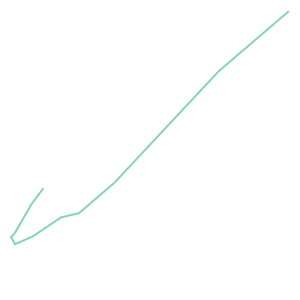

In [ ]:
reach.geometry.iloc[0]

In [ ]:
def create_angled_lines(line, angle):
    p1 = line.coords[0]
    p2 = line.coords[-1]
    
    lineAngle = math.atan2(p2[1] - p1[1], p2[0]  - p1[0])
    angle     = math.radians(angle)
    length    = line.length


    endxp = p1[0] + length * math.cos(angle + lineAngle)
    endyp = p1[1] + length * math.sin(angle + lineAngle)
    angled_linep = LineString([p1, (endxp, endyp)])
    
    endxm = p1[0] + length * math.cos((angle *-1) + lineAngle)
    endym = p1[1] + length * math.sin((angle *-1) + lineAngle)
    angled_linem = LineString([p1, (endxm, endym)])
    
    return (angled_linep, angled_linem)

163.0 163.0 1303.5


In [ ]:
import glob
files = glob.glob(directory + 'input/SWOT_vector/*.shp')
files.sort()
files[5]

'/scratch/6256481/input/SWOT_vector/af_sword_reaches_hb16_v16.shp'

# Test dem code

In [ ]:
from dem import find_dem_bounds, df_add_row

import rioxarray
from shapely.geometry import Polygon
df_dem = find_dem_bounds(directory, projection)

loop done


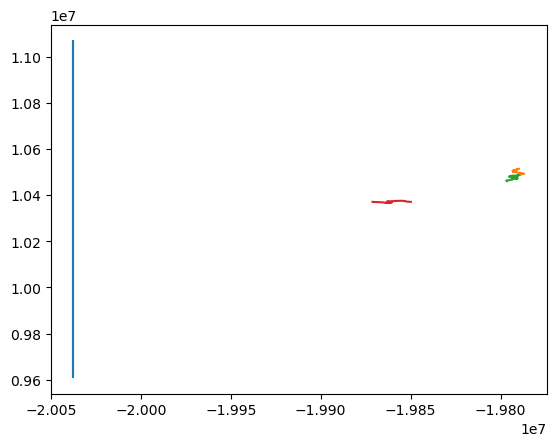

(-19793434.278188664, 10487649.502458414, -19786968.393311344, 10515007.473707044)


In [ ]:
A = df_dem[(df_dem.Folder == 'n60w180') & (df_dem.Name == 'n65w180')]
plt.plot(*A.iloc[0].geometry.exterior.xy)

plt.plot(*rows.iloc[0].geometry.xy)
plt.plot(*rows.iloc[1].geometry.xy)
plt.plot(*rows.iloc[2].geometry.xy)
plt.show()
print(rows.iloc[0].geometry.bounds)

In [ ]:
rows= df_emptyConf_Tile[df_emptyConf_Tile.reach_id.isin([35301200031, 35301200021, 35301200131])]
rows= dfT[dfT.reach_id.isin([35301200031, 35301200021, 35301200131])]
row = rows.iloc[0]
# 35301200031 292
# 35301200021 291
rows

,x,y,reach_id,reach_len,n_nodes,wse,wse_var,width,width_var,facc,...,maxoutSlope,minnSlope,maxinnSlope,moutPR,maxoutPR,minnPR,maxinnPR,mCDists,maxCDists,File
5004,-177.782108,68.179231,35301200021,44493.688311,83,3.000000,3.992577,42.0,931.257736,163.113887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.732143,689.464286,as_35
5005,-177.806468,68.096314,35301200031,37329.747134,70,20.900000,62.601637,42.0,187.832220,109.361949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.732143,689.464286,as_35
5013,-178.413514,67.745239,35301200131,38708.106400,73,64.700005,25.834856,237.0,10747.623937,26705.747644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.732143,689.464286,as_35


In [ ]:
def find_dem_bounds(directory, projection):
    dem_folders = glob.glob(directory + 'input/MERIT_dem/*0')
    dem_boundary_file = directory + 'input_created/MERIT_dem_bounds.shp'
    if len(glob.glob(dem_boundary_file)) == 1:
        gdf = gpd.read_file(dem_boundary_file)
    else:
        df = pd.DataFrame(columns = ['Folder','Name', 'minx', 'miny', 'maxx', 'maxy'])
        crs_bounds = find_crs_bounds(projection)
        # for folder in tqdm.tqdm(dem_folders): # loop over all the folders for MERIT
        j = 1
        for folder in dem_folders:
            
            dem_files = glob.glob(f'{folder}/*.tif')
            i = 1

            for f in dem_files: # loop over all the tiffs in a folder                

                # open raster and reproject to mercator projection
                raster = rioxarray.open_rasterio(f)    
                if raster.rio.crs != 'EPSG:4326':
                    bounds = raster.transform_bounds("EPSG:4326")
                else:
                    bounds = raster.rio.bounds() 
            
                df = df_add_row(df, folder[-7::], f[-15:-8], bounds)    
        print('loop done')
        # create box from the min and max coordinates
        df['geometry'] = df.apply(lambda row: Polygon([
            (row['maxx'], row['miny']),
            (row['maxx'], row['maxy']),
            (row['minx'], row['maxy']),
            (row['minx'], row['miny']),
            (row['maxx'], row['miny'])
            ]), axis=1)
    
        # Step 3: Convert the DataFrame to a GeoDataFrame
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        
        # Set the Coordinate Reference System (CRS) to WGS84 (EPSG:4326)
        gdf.set_crs(epsg=3857, inplace=True)
        
        gdf.to_file(dem_boundary_file, crs = projection)
    return gdf

find_dem_bounds(directory, projection)

/scratch/6256481/python/py_code/dem.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([newRow])], ignore_index=True)


loop done


,Folder,Name,minx,miny,maxx,maxy,geometry
0,n60e060,n65e065,64.999583,64.999583,69.999583,69.999583,"POLYGON ((70.000 65.000, 70.000 70.000, 65.000..."
1,n60e060,n65e075,74.999583,64.999583,79.999583,69.999583,"POLYGON ((80.000 65.000, 80.000 70.000, 75.000..."
2,n60e060,n60e080,79.999583,59.999583,84.999583,64.999583,"POLYGON ((85.000 60.000, 85.000 65.000, 80.000..."
3,n60e060,n75e080,79.999583,74.999583,84.999583,79.999583,"POLYGON ((85.000 75.000, 85.000 80.000, 80.000..."
4,n60e060,n70e075,74.999583,69.999583,79.999583,74.999583,"POLYGON ((80.000 70.000, 80.000 75.000, 75.000..."
...,...,...,...,...,...,...,...
1145,s60w090,s35w075,-75.000417,-35.000417,-70.000417,-30.000417,"POLYGON ((-70.000 -35.000, -70.000 -30.000, -7..."
1146,s60w090,s55w080,-80.000417,-55.000417,-75.000417,-50.000417,"POLYGON ((-75.000 -55.000, -75.000 -50.000, -8..."
1147,s60w090,s50w075,-75.000417,-50.000417,-70.000417,-45.000417,"POLYGON ((-70.000 -50.000, -70.000 -45.000, -7..."
1148,s60w180,s45w180,-180.000417,-45.000417,-175.000417,-40.000417,"POLYGON ((-175.000 -45.000, -175.000 -40.000, ..."


In [ ]:
fi = glob.glob(directory + 'input/MERIT_dem/*n00e000*/n05e000*')[0]




In [ ]:
A = raster.rio.crs
print(A)

raster.rio.crs == 'EPSG:4326'

EPSG:4326


True

In [ ]:
def find_dem(row_in, directory, projection, plot):
    row = row_in.to_crs('EPSG:4326')
    row = row.iloc[0]

    df_dem = find_dem_bounds(directory, projection)
    
    intersections = row.geometry.intersects(df_dem.geometry)
    
    df_dem_row = df_dem[intersections]


    if df_dem_row.shape[0] == 1:
        f = directory + f'input/MERIT_dem/dem_tif_{df_dem_row.iloc[0].Folder}/{df_dem_row.iloc[0].Name}_dem.tif'
        raster = rioxarray.open_rasterio(f) 
        raster = raster.rio.reproject(projection)
    elif df_dem_row.shape[0] > 1:
        rasters = []
        for i in range(df_dem_row.shape[0]):    
            f = directory + f'input/MERIT_dem/dem_tif_{df_dem_row.iloc[i].Folder}/{df_dem_row.iloc[i].Name}_dem.tif'
            rasters.append(rioxarray.open_rasterio(f))
            rasters[i] = rasters[i].rio.reproject(projection)
            
        # Merge/Mosaic multiple rasters using merge_arrays method of rioxarray
        res1 = rasters[0].rio.resolution()

        raster = merge_arrays(dataarrays = rasters,
                                  res = (res1[0], res1[0]), crs=rasters[0].rio.crs)
        
    else:
        print('ERROR NO MATCHING DEM FOUND')
    
    row = row_in.iloc[0]
    bounds = row.geometry.buffer(int(row.max_width * 10)).bounds
    
    raster = raster.rio.clip_box(
            minx=bounds[0],
            miny=bounds[1],
            maxx=bounds[2],
            maxy=bounds[3]
            )
    if plot == True:
        raster.plot()
        plt.plot(*row.geometry.xy)
        plt.show()
    return raster
rows= df_emptyConf_Tile[df_emptyConf_Tile.reach_id.isin([35301200031, 35301200021, 35301200131])]
rows= dfT[dfT.reach_id.isin([35301200031, 35301200021, 35301200131])]
row = rows.iloc[0]

row = dfT[dfT.reach_id == 35301200031]

find_dem(row, directory, projection, False)

/scratch/6256481/python/py_code/dem.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([newRow])], ignore_index=True)


loop done


<xarray.DataArray (band: 1, y: 7, x: 3)> Size: 84B
array([[[19.517262, 22.001236,  8.881059],
        [23.414581, 24.019627, 13.761505],
        [25.152443, 25.929977, 21.791702],
        [34.285374, 30.828487, 39.845856],
        [47.89797 , 50.873985, 58.780968],
        [41.75541 , 59.88171 , 65.80224 ],
        [52.09564 , 64.62087 , 70.82594 ]]], dtype=float32)
Coordinates:
  * x            (x) float64 24B -1.98e+07 -1.979e+07 -1.979e+07
  * y            (y) float64 56B 1.049e+07 1.048e+07 ... 1.047e+07 1.046e+07
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -9999.0

In [ ]:

dem_folders = glob.glob(directory + 'input/MERIT_dem/*0')
dem_folders.sort()
dem_boundary_file = directory + 'input_created/MERIT_dem_bounds.shp'
if len(glob.glob(dem_boundary_file)) == 10:
    gdf = gpd.read_file(dem_boundary_file)
else:
    df = pd.DataFrame(columns = ['Folder','Name', 'minx', 'miny', 'maxx', 'maxy'])
    crs_bounds = find_crs_bounds(projection)
    # for folder in tqdm.tqdm(dem_folders): # loop over all the folders for MERIT
    j = 1

    T = 34
    dem_folders = dem_folders[T:T+1]
    print(dem_folders)
    for folder in dem_folders:
        
        dem_files = glob.glob(f'{folder}/*.tif')
        dem_files.sort()
        i = 1
        print(folder)
        dem_files = dem_files[-5:-4]
        for f in dem_files: # loop over all the tiffs in a folder
            # print(f'{i}, {j} of {len(dem_files)}/{len(dem_folders)}')

            # open raster and reproject to mercator projection
            raster = rioxarray.open_rasterio(f)    
            raster = raster.rio.reproject(projection)
            
            bounds = raster.rio.bounds() # extract bounds for TIF
            print(bounds)
            # check if bounding box lies on the edge of the CRS
                # if this is the case two seperate bounding boxes are created
            # percentual distance to the upper and lower crs boundary
            lower_perc_distance = bounds[0] / crs_bounds[0] 
            upper_perc_distance = bounds[2] / crs_bounds[2]
    
            # check sign change of x coordinates and distance to crs bounding box edge
            if (np.sign(bounds[0]) != np.sign(bounds[2])) & (                
                    (lower_perc_distance > 0.95) | (upper_perc_distance > 0.95)):
                                                                
                bounds1 = [crs_bounds[0], bounds[1], bounds[0]    , bounds[3]]
                bounds2 = [bounds[2]    , bounds[1], crs_bounds[2], bounds[3]]
                print(bounds1)
                print(bounds2)
                # df = df_add_row(df, folder[-7::], f[-15:-8], bounds1)
                # df = df_add_row(df, folder[-7::], f[-15:-8], bounds2)
                
            # else:
            #     df = df_add_row(df, folder[-7::], f[-15:-8], bounds)    
    print('loop done')
    # create box from the min and max coordinates
    df['geometry'] = df.apply(lambda row: Polygon([
        (row['maxx'], row['miny']),
        (row['maxx'], row['maxy']),
        (row['minx'], row['maxy']),
        (row['minx'], row['miny']),
        (row['maxx'], row['miny'])
        ]), axis=1)

    # Step 3: Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    
    # Set the Coordinate Reference System (CRS) to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=3857, inplace=True)
    
    gdf.to_file(dem_boundary_file, crs = projection)

(-19793434.278188664, 10487649.502458414, -19786968.393311344, 10515007.473707044)

['/scratch/6256481/input/MERIT_dem/dem_tif_n60w180']
/scratch/6256481/input/MERIT_dem/dem_tif_n60w180
(-20037508.269183215, 9609853.223157777, 20037399.31279463, 11068580.045560535)
[-20037508.342789244, 9609853.223157777, -20037508.269183215, 11068580.045560535]
[20037399.31279463, 9609853.223157777, 20037508.342789244, 11068580.045560535]
loop done


ValueError: Cannot set a DataFrame with multiple columns to the single column geometry

# Save Files
